<a href="https://colab.research.google.com/github/ADSLAN/ADSLAN/blob/main/EmplyeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
* [Import Python Libaries](#Import)
* [Methodology](#Methodology)
    * [CRISP-DM Methodology](#CRISP-DM-Methodology)
* [Business Understanding](#Business-Understanding)
* [Data Understanding](#Data-Understanding)
    * [Upload Datasets](#Upload-Dataset)
    * [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Data Preparation](#preparation)
    * [Features Selection Method](#features-selection-method)
* [Modelling](#Modelling)
    * [Selected Features](#Selected)
    * [Visualize the Features](#visualize)
    * [Further Analysis Using Pivot Tables](#tables)
* [Evaluation](#Evaluation)
* [Deployment](#Deployment)


# Import Python Libraries <a id = "Import"></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Methodology <a id="Methodology"></a>

### CRISP-DM Methodology <a id="CRISP-DM-Methodology"></a>
We will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework to guide our analysis process. The CRISP-DM framework consists of the following steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

Each step involves specific activities aimed at achieving our project objectives. This framework also serves as guide for integrating the individual contributions of each teammate in this collaborative project. By following this structured approach, we ensure that our analysis is systematic and comprehensive, leading to actionable insights and solutions.

# 1. Business Understanding <a id="Business-Understanding"></a>

Our project focuses on understanding the factors driving attrition within organizations. Attrition, the gradual loss of employees, poses challenges to productivity and stability. By analyzing employee data, including demographics and job satisfaction, we aim to identify patterns that contribute to attrition. This analysis will help develop strategies to retain employees and improve organizational performance.

## 2. Data Understanding <a id = "Data-Understanding"></a>

The IBM HR Analytics Employee Attrition & Performance dataset is a fictional dataset created by IBM data scientists to explore HR questions through data analytics. It's widely used for predictive modeling and analytics purposes in HR. In this analysis, we combine the original Dataset with two more datasets from an alternative data source, to make for a more robust analysis.

## Upload Dataset <a id = "Upload-Dataset"></a>


<h3>1. Kaggle Data </h3>
Dataset Source:

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Downloading data from Kaggle:
- Create dataset folder for appropriate path setting
- load dataset using pandas read function
- Take a glimpse at dataset using pandas head function.

We will load and preview the first data from the Kaggle source using the pandas library

In [5]:
k1Data = pd.read_csv("./attrition_datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")
k1Data.head()

FileNotFoundError: [Errno 2] No such file or directory: './attrition_datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv'

<font color = "brown">Data Inspection</font>

- Check if there are any null or missing entry in the data

In [6]:
k1Data.isna().sum()

NameError: name 'k1Data' is not defined

<font color = "red">Observation:</font>
    There are no null data in the first dataset.

- Quick overview of the data:

In [ ]:
k1Data.info()

<font color = "red">Observation:</font>
In the dataset, there are
- 35 Columns
- 1470 rows
- 2 Datatypes (Int and Object)

- Quick description of the data

In [ ]:
k1Data.describe()

NameError: name 'k1Data' is not defined

<font color = "red">Observation:</font>
Mean, max, min, standard deviation, and quantiles of each feature in the dataset

<h3>2. Other Data</h3>

Data Source:
    
https://excelbianalytics.com/wp/downloads-21-sample-csv-files-data-sets-for-testing-till-5-million-records-hr-analytics-for-attrition/


Load and preview the second data  

In [ ]:
k5Data = pd.read_csv("./attrition_datasets/5000 HRA Records.csv")
k5Data.head()

FileNotFoundError: [Errno 2] No such file or directory: './attrition_datasets/5000 HRA Records.csv'

<font color = "brown">Data Inspection</font>

- Check if there are any null or missing entry in the second data

In [ ]:
k5Data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<font color = "red">Observation:</font>
No missing entry in the second data

- Quick overview of the data

In [ ]:
k5Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       5000 non-null   int64 
 1   Attrition                 5000 non-null   object
 2   BusinessTravel            5000 non-null   object
 3   DailyRate                 5000 non-null   int64 
 4   Department                5000 non-null   object
 5   DistanceFromHome          5000 non-null   int64 
 6   Education                 5000 non-null   int64 
 7   EducationField            5000 non-null   object
 8   EmployeeCount             5000 non-null   int64 
 9   EmployeeNumber            5000 non-null   int64 
 10  EnvironmentSatisfaction   5000 non-null   int64 
 11  Gender                    5000 non-null   object
 12  HourlyRate                5000 non-null   int64 
 13  JobInvolvement            5000 non-null   int64 
 14  JobLevel                

<font color = "red">Observation:</font>
In the dataset, there are
- 35 Columns
- 5000 rows
- 2 Datatypes (Int and Object)

- Quick description of the data

In [ ]:
k5Data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  5000.000000  5000.000000        5000.00000  5000.000000         5000.0   
mean     39.068800   805.025600          25.22640     2.997400            1.0   
std      12.275643   404.232929          14.49822     1.408187            0.0   
min      18.000000   100.000000           1.00000     1.000000            1.0   
25%      28.000000   454.000000          12.00000     2.000000            1.0   
50%      39.000000   799.000000          25.00000     3.000000            1.0   
75%      50.000000  1163.000000          38.00000     4.000000            1.0   
max      60.000000  1500.000000          50.00000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     5000.000000              5000.000000  5000.000000     5000.000000   
mean      2500.500000                 2.472600   114.138800        2.510600   
std       1443.520003                 1.128142    49.664032        1.120419   
min          1.000000                 1.000000    30.000000        1.000000   
25%       1250.750000                 1.000000    71.000000        1.000000   
50%       2500.500000                 2.000000   115.000000        3.000000   
75%       3750.250000                 3.000000   157.000000        4.000000   
max       5000.000000                 4.000000   200.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  5000.000000  ...                5000.00000         5000.0   
mean      3.000200  ...                   2.53500           80.0   
std       1.419931  ...                   1.11724            0.0   
min       1.000000  ...                   1.00000           80.0   
25%       2.000000  ...                   2.00000           80.0   
50%       3.000000  ...                   3.00000           80.0   
75%       4.000000  ...                   4.00000           80.0   
max       5.000000  ...                   4.00000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       5000.000000        5000.000000            5000.000000   
mean           2.497800          20.532400               3.507600   
std            1.115278          11.427592               1.686449   
min            1.000000           1.000000               1.000000   
25%            1.000000          11.000000               2.000000   
50%            3.000000          20.500000               4.000000   
75%            3.000000          30.000000               5.000000   
max            4.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      5000.000000     5000.000000         5000.000000   
mean          2.511000       10.709200            5.872200   
std           1.114508        8.861441            5.901697   
min           1.000000        1.000000            1.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        8.000000            4.000000   
75%           4.000000       16.000000            8.000000   
max           4.000000       40.000000           35.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              5000.000000           5000.000000  
mean                  5.880000              5.891400  
std                   6.049869              6.042988  
min                   1.000000              1.000000  
25%                   1.000000              1.000000  
50%                   4.000000              4.000000  
75%                   8.000000              8.000000  
max                  39.000000             40.000000  

[8 rows x 26 columns]

<font color = "red">Observation:</font>
Mean, max, min, standard deviation, and quantiles of each feature in the dataset

- Load and preview the second data

In [ ]:
k10Data = pd.read_csv("./attrition_datasets/10000 HRA Records.csv")
k10Data.head()

Age Attrition     BusinessTravel  DailyRate       Department  \
0   24        No      Travel_Rarely       1084          Support   
1   22        No  Travel_Frequently        537            Sales   
2   33       Yes      Travel_Rarely        418  Human Resources   
3   20        No         Non-Travel        516  Human Resources   
4   48        No         Non-Travel        497  Human Resources   

   DistanceFromHome  Education   EducationField  EmployeeCount  \
0                31          5          Medical              1   
1                47          5    Life Sciences              1   
2                45          5            Other              1   
3                 9          1  Human Resources              1   
4                44          1  Human Resources              1   

   EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0               1  ...                         3            80   
1               2  ...                         3            80   
2               3  ...                         1            80   
3               4  ...                         3            80   
4               5  ...                         2            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 3                 39                      3               3   
1                 1                  4                      1               2   
2                 4                 21                      5               4   
3                 4                 24                      1               1   
4                 4                 15                      3               1   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0              23                  6                       14   
1               1                  1                        1   
2               4                  1                        2   
3              14                  6                       11   
4               6                  3                        4   

   YearsWithCurrManager  
0                     6  
1                     1  
2                     2  
3                     8  
4                     2  

[5 rows x 35 columns]

- Check for missing data

In [ ]:
k10Data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<font color = "red">Observation:</font>
No missing entry in the second data

- Quick description of the data

In [ ]:
k10Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       10000 non-null  int64 
 1   Attrition                 10000 non-null  object
 2   BusinessTravel            10000 non-null  object
 3   DailyRate                 10000 non-null  int64 
 4   Department                10000 non-null  object
 5   DistanceFromHome          10000 non-null  int64 
 6   Education                 10000 non-null  int64 
 7   EducationField            10000 non-null  object
 8   EmployeeCount             10000 non-null  int64 
 9   EmployeeNumber            10000 non-null  int64 
 10  EnvironmentSatisfaction   10000 non-null  int64 
 11  Gender                    10000 non-null  object
 12  HourlyRate                10000 non-null  int64 
 13  JobInvolvement            10000 non-null  int64 
 14  JobLevel               

<font color = "red">Observation:</font>
In the dataset, there are
- 35 Columns
- 5000 rows
- 2 Datatypes (Int and Object)

- Quick description of the data

In [ ]:
k10Data.describe()

Age     DailyRate  DistanceFromHome     Education  \
count  10000.000000  10000.000000      10000.000000  10000.000000   
mean      39.036400    806.545600         25.322100      2.973500   
std       12.489318    405.132923         14.454454      1.417533   
min       18.000000    100.000000          1.000000      1.000000   
25%       28.000000    455.000000         13.000000      2.000000   
50%       39.000000    807.500000         25.000000      3.000000   
75%       50.000000   1160.000000         38.000000      4.000000   
max       60.000000   1500.000000         50.000000      5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction    HourlyRate  \
count        10000.0     10000.00000             10000.000000  10000.000000   
mean             1.0      5000.50000                 2.492200    114.767400   
std              0.0      2886.89568                 1.117526     49.516602   
min              1.0         1.00000                 1.000000     30.000000   
25%              1.0      2500.75000                 1.000000     72.000000   
50%              1.0      5000.50000                 2.000000    115.000000   
75%              1.0      7500.25000                 3.000000    158.000000   
max              1.0     10000.00000                 4.000000    200.000000   

       JobInvolvement      JobLevel  ...  RelationshipSatisfaction  \
count    10000.000000  10000.000000  ...              10000.000000   
mean         2.505000      3.006800  ...                  2.490800   
std          1.115751      1.402266  ...                  1.114558   
min          1.000000      1.000000  ...                  1.000000   
25%          2.000000      2.000000  ...                  1.750000   
50%          3.000000      3.000000  ...                  2.000000   
75%          3.000000      4.000000  ...                  3.000000   
max          4.000000      5.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count        10000.0       10000.00000       10000.000000   
mean            80.0           2.49770          20.551900   
std              0.0           1.11764          11.563212   
min             80.0           1.00000           1.000000   
25%             80.0           2.00000          11.000000   
50%             80.0           2.00000          21.000000   
75%             80.0           4.00000          31.000000   
max             80.0           4.00000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count           10000.000000     10000.000000    10000.000000   
mean                3.488800         2.488600       10.700800   
std                 1.707386         1.118032        8.826226   
min                 1.000000         1.000000        1.000000   
25%                 2.000000         1.000000        3.000000   
50%                 4.000000         2.000000        8.000000   
75%                 5.000000         3.000000       16.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count        10000.000000              10000.00000          10000.000000  
mean             5.815200                  5.89730              5.785700  
std              5.907786                  6.03072              5.915342  
min              1.000000                  1.00000              1.000000  
25%              1.000000                  2.00000              1.000000  
50%              4.000000                  4.00000              4.000000  
75%              8.000000                  8.00000              8.000000  
max             39.000000                 38.00000             38.000000  

[8 rows x 26 columns]

<font color = "red">Observation:</font>
Mean, max, min, standard deviation, and quantiles of each feature in the dataset

<h3>3. Concatenate all 3 data</h3>

Combine the 3 datasets into one dataset

In [ ]:
data = pd.concat([k1Data, k5Data, k10Data], ignore_index = True)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

After combining into one dataset, we check if there are null or missing entry

In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<font color = "red">Observation:</font>
No missing entry in the second data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16470 entries, 0 to 16469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       16470 non-null  int64 
 1   Attrition                 16470 non-null  object
 2   BusinessTravel            16470 non-null  object
 3   DailyRate                 16470 non-null  int64 
 4   Department                16470 non-null  object
 5   DistanceFromHome          16470 non-null  int64 
 6   Education                 16470 non-null  int64 
 7   EducationField            16470 non-null  object
 8   EmployeeCount             16470 non-null  int64 
 9   EmployeeNumber            16470 non-null  int64 
 10  EnvironmentSatisfaction   16470 non-null  int64 
 11  Gender                    16470 non-null  object
 12  HourlyRate                16470 non-null  int64 
 13  JobInvolvement            16470 non-null  int64 
 14  JobLevel              

<font color = "red">Observation:</font>
In the dataset, there are
- 35 Columns
- 16470 rows
- 2 Datatypes (Int and Object)

In [ ]:
data.describe()

Age     DailyRate  DistanceFromHome     Education  \
count  16470.000000  16470.000000      16470.000000  16470.000000   
mean      38.857681    805.721797         23.853430      2.975349   
std       12.176013    404.692495         14.750727      1.384183   
min       18.000000    100.000000          1.000000      1.000000   
25%       29.000000    456.000000         10.000000      2.000000   
50%       39.000000    804.000000         23.000000      3.000000   
75%       49.000000   1161.000000         37.000000      4.000000   
max       60.000000   1500.000000         50.000000      5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction    HourlyRate  \
count        16470.0    16470.000000             16470.000000  16470.000000   
mean             1.0     3886.706254                 2.506740    110.214208   
std              0.0     2791.509660                 1.120597     49.667000   
min              1.0        1.000000                 1.000000     30.000000   
25%              1.0     1521.000000                 2.000000     67.000000   
50%              1.0     3383.000000                 3.000000    106.000000   
75%              1.0     5882.750000                 4.000000    153.000000   
max              1.0    10000.000000                 4.000000    200.000000   

       JobInvolvement      JobLevel  ...  RelationshipSatisfaction  \
count    16470.000000  16470.000000  ...              16470.000000   
mean         2.526776      2.920644  ...                  2.523983   
std          1.089077      1.409640  ...                  1.114111   
min          1.000000      1.000000  ...                  1.000000   
25%          2.000000      2.000000  ...                  2.000000   
50%          3.000000      3.000000  ...                  3.000000   
75%          3.000000      4.000000  ...                  4.000000   
max          4.000000      5.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count        16470.0      16470.000000       16470.000000   
mean            80.0          2.345659          19.718397   
std              0.0          1.198628          11.541154   
min             80.0          0.000000           0.000000   
25%             80.0          1.000000          10.000000   
50%             80.0          2.000000          19.000000   
75%             80.0          3.000000          30.000000   
max             80.0          4.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count           16470.000000     16470.000000    16470.000000   
mean                3.432969         2.519733       10.373770   
std                 1.679555         1.089172        8.694326   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        8.000000   
75%                 5.000000         3.000000       15.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count        16470.000000             16470.000000          16470.000000  
mean             5.690953                 5.560959              5.669399  
std              5.757053                 5.935719              5.805293  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 1.000000              1.000000  
50%              4.000000                 3.000000              3.000000  
75%              8.000000                 8.000000              8.000000  
max             39.000000                39.000000             40.000000  

[8 rows x 26 columns]

<font color = "red">Observation:</font>
Mean, max, min, standard deviation, and quantiles of each feature in the dataset

- Identifying outliers using Boxplots:
    - Extract columns that are numerical from our dataset
    - Calculate number of rows and columuns for subplots
    - Create subplots for each boxplots
    - Show figures

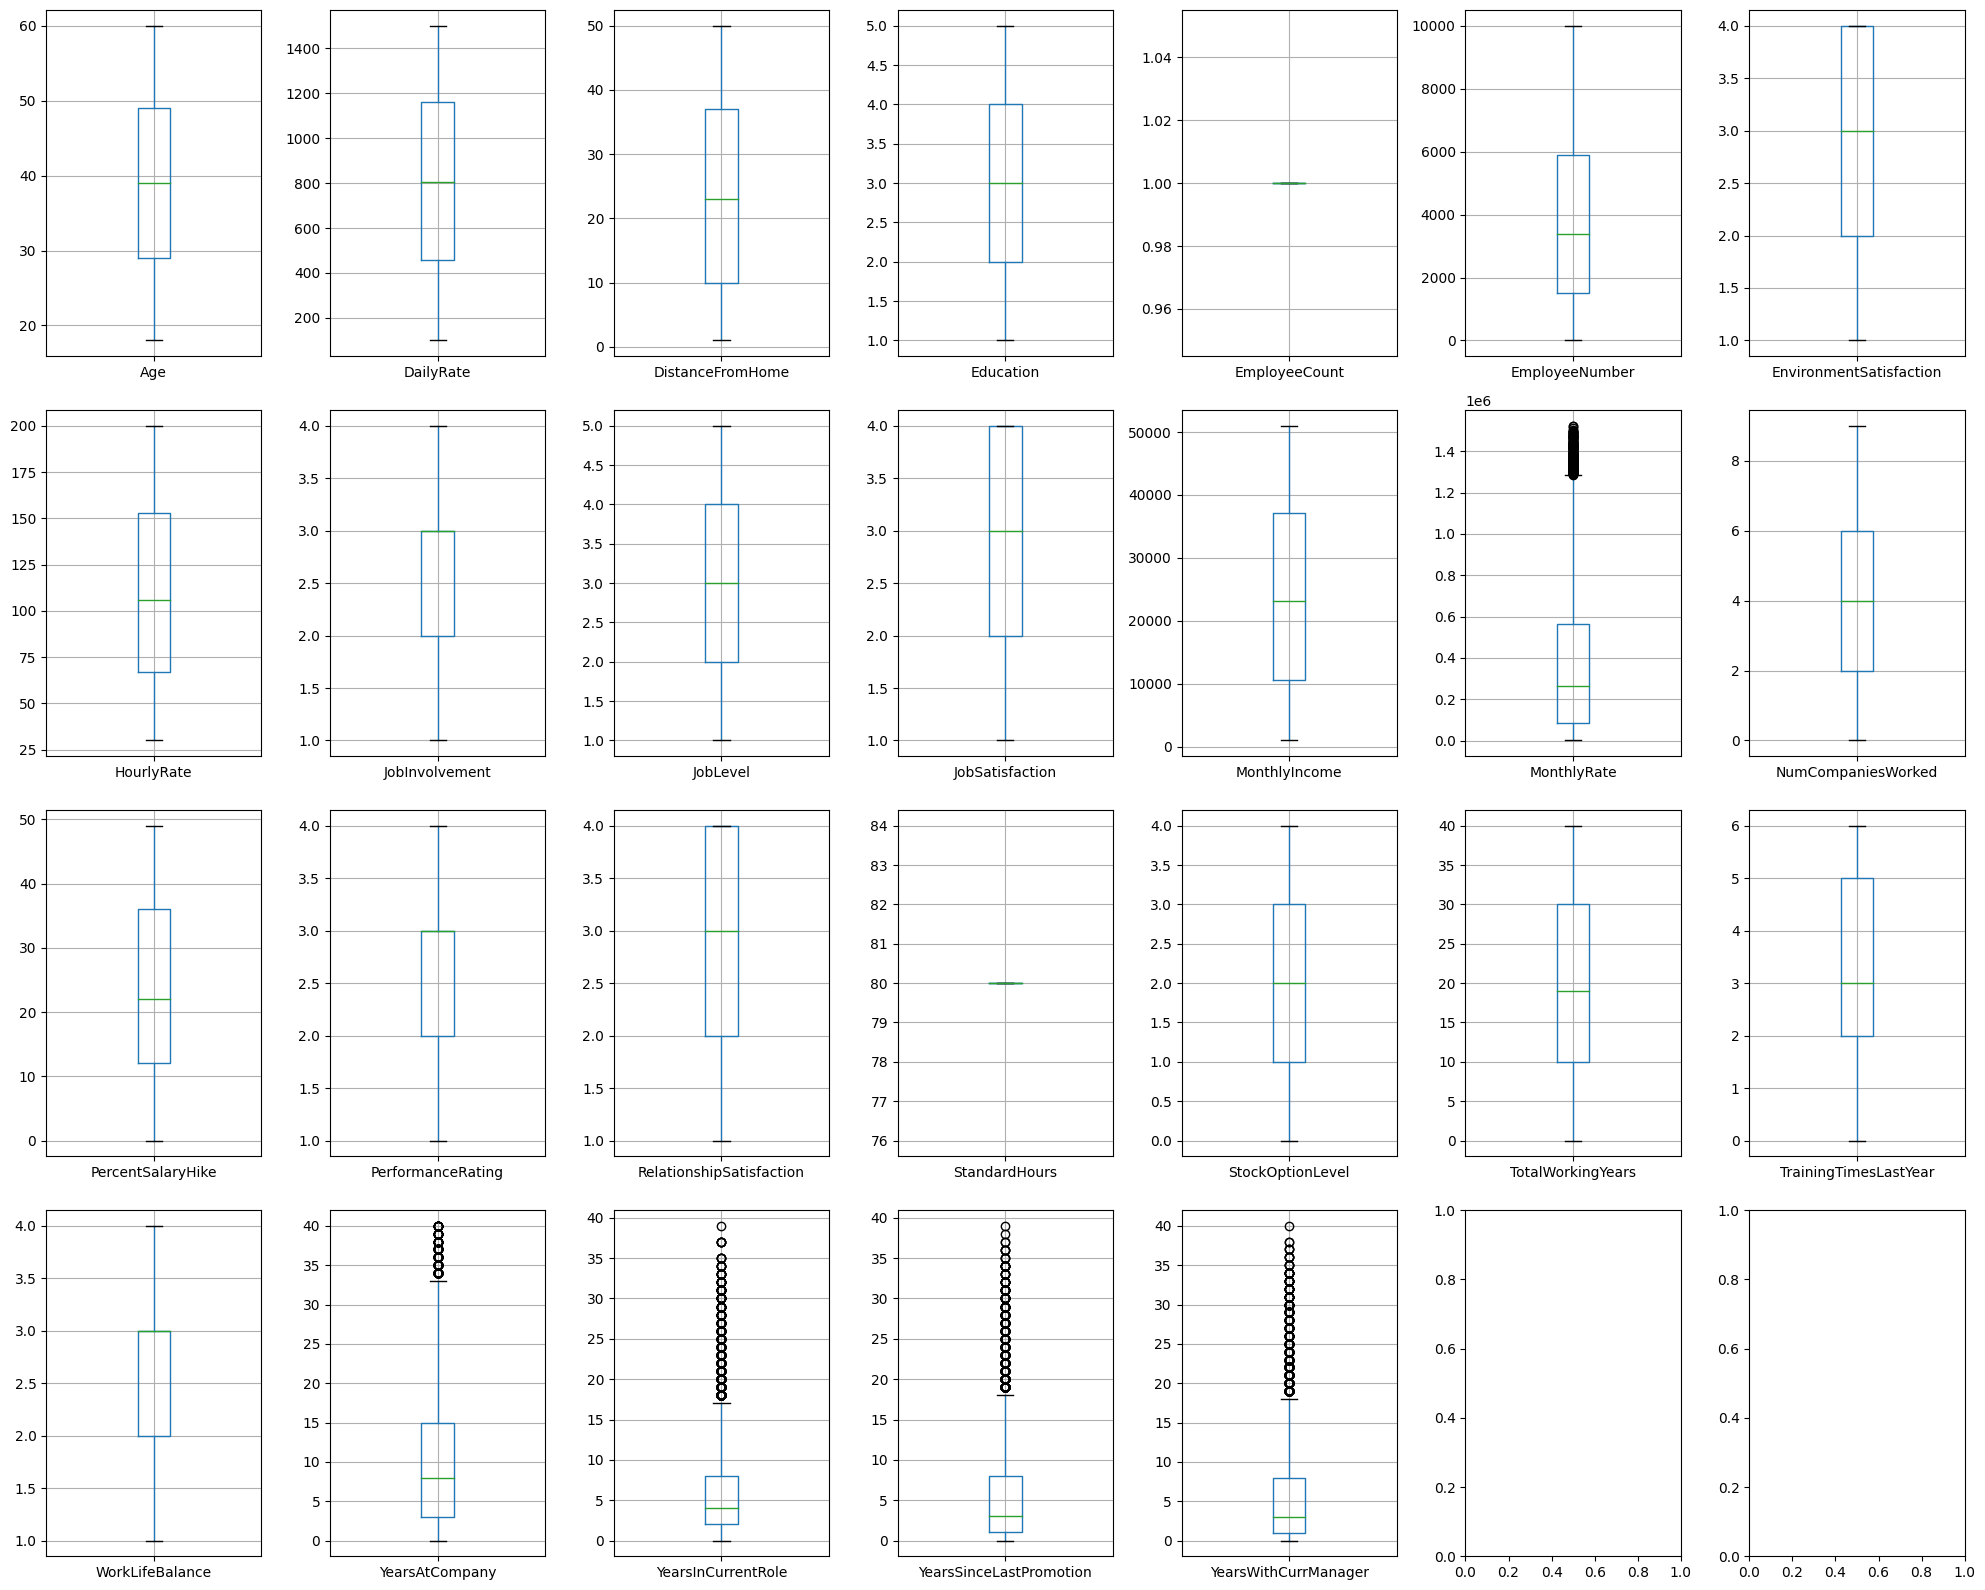

In [ ]:
numerical_columns = data.select_dtypes(include = ["number"]).columns
num_plots = len(numerical_columns)
num_cols = 7
num_rows = -(-num_plots // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize = (20, 4 * num_rows))
for i, column in enumerate(numerical_columns):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    data.boxplot(column = column, ax = ax)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

<font color = "red">Observation:</font> Potential outliers are observed in columns: <font color = "green">Monthly Rate, Years at company, years in current role, years since last promotion, years with curr manager.


- Trimming Outliers as much as possible without upsetting the data balance
    - Calculate Q1 (25th percentile of the data) for each column
    - Calculate Q3 (75th percentile of the data) for each column
    - Calculate the IQR for each column
    - Define and apply function to filter outliers based on the IQR
    - Show figures

In [ ]:
def remove_outliers(data, inplace = True):
    """
    This function remove outliers from numerical columns of a DataFrame and optionally drop rows with NA values.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - inplace (bool): If True, remove outliers and NA values from the original DataFrame in place. If False, return a new DataFrame with outliers removed and NA values dropped (default is True).

    Returns:
    - None if inplace=True, or
    - DataFrame if inplace=False (a new DataFrame with outliers removed and NA values dropped).
    """
    numerical_columns = data.select_dtypes(include=["number"]).columns
    Q1 = data[numerical_columns].quantile(0.25)
    Q3 = data[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1

    def filter_outliers(column):
        lower_bound = Q1[column.name] - 1.5 * IQR[column.name]
        upper_bound = Q3[column.name] + 1.5 * IQR[column.name]
        return data[column.name].between(lower_bound, upper_bound)

    data_output = data[numerical_columns][data[numerical_columns].apply(filter_outliers, axis = 0)]

    if inplace:
        data[numerical_columns] = data_output
        data.dropna(inplace = True)
        return None
    else:
        data_cleaned = data_output.dropna()  # Create a copy without modifying original
        return data_output

remove_outliers(data)

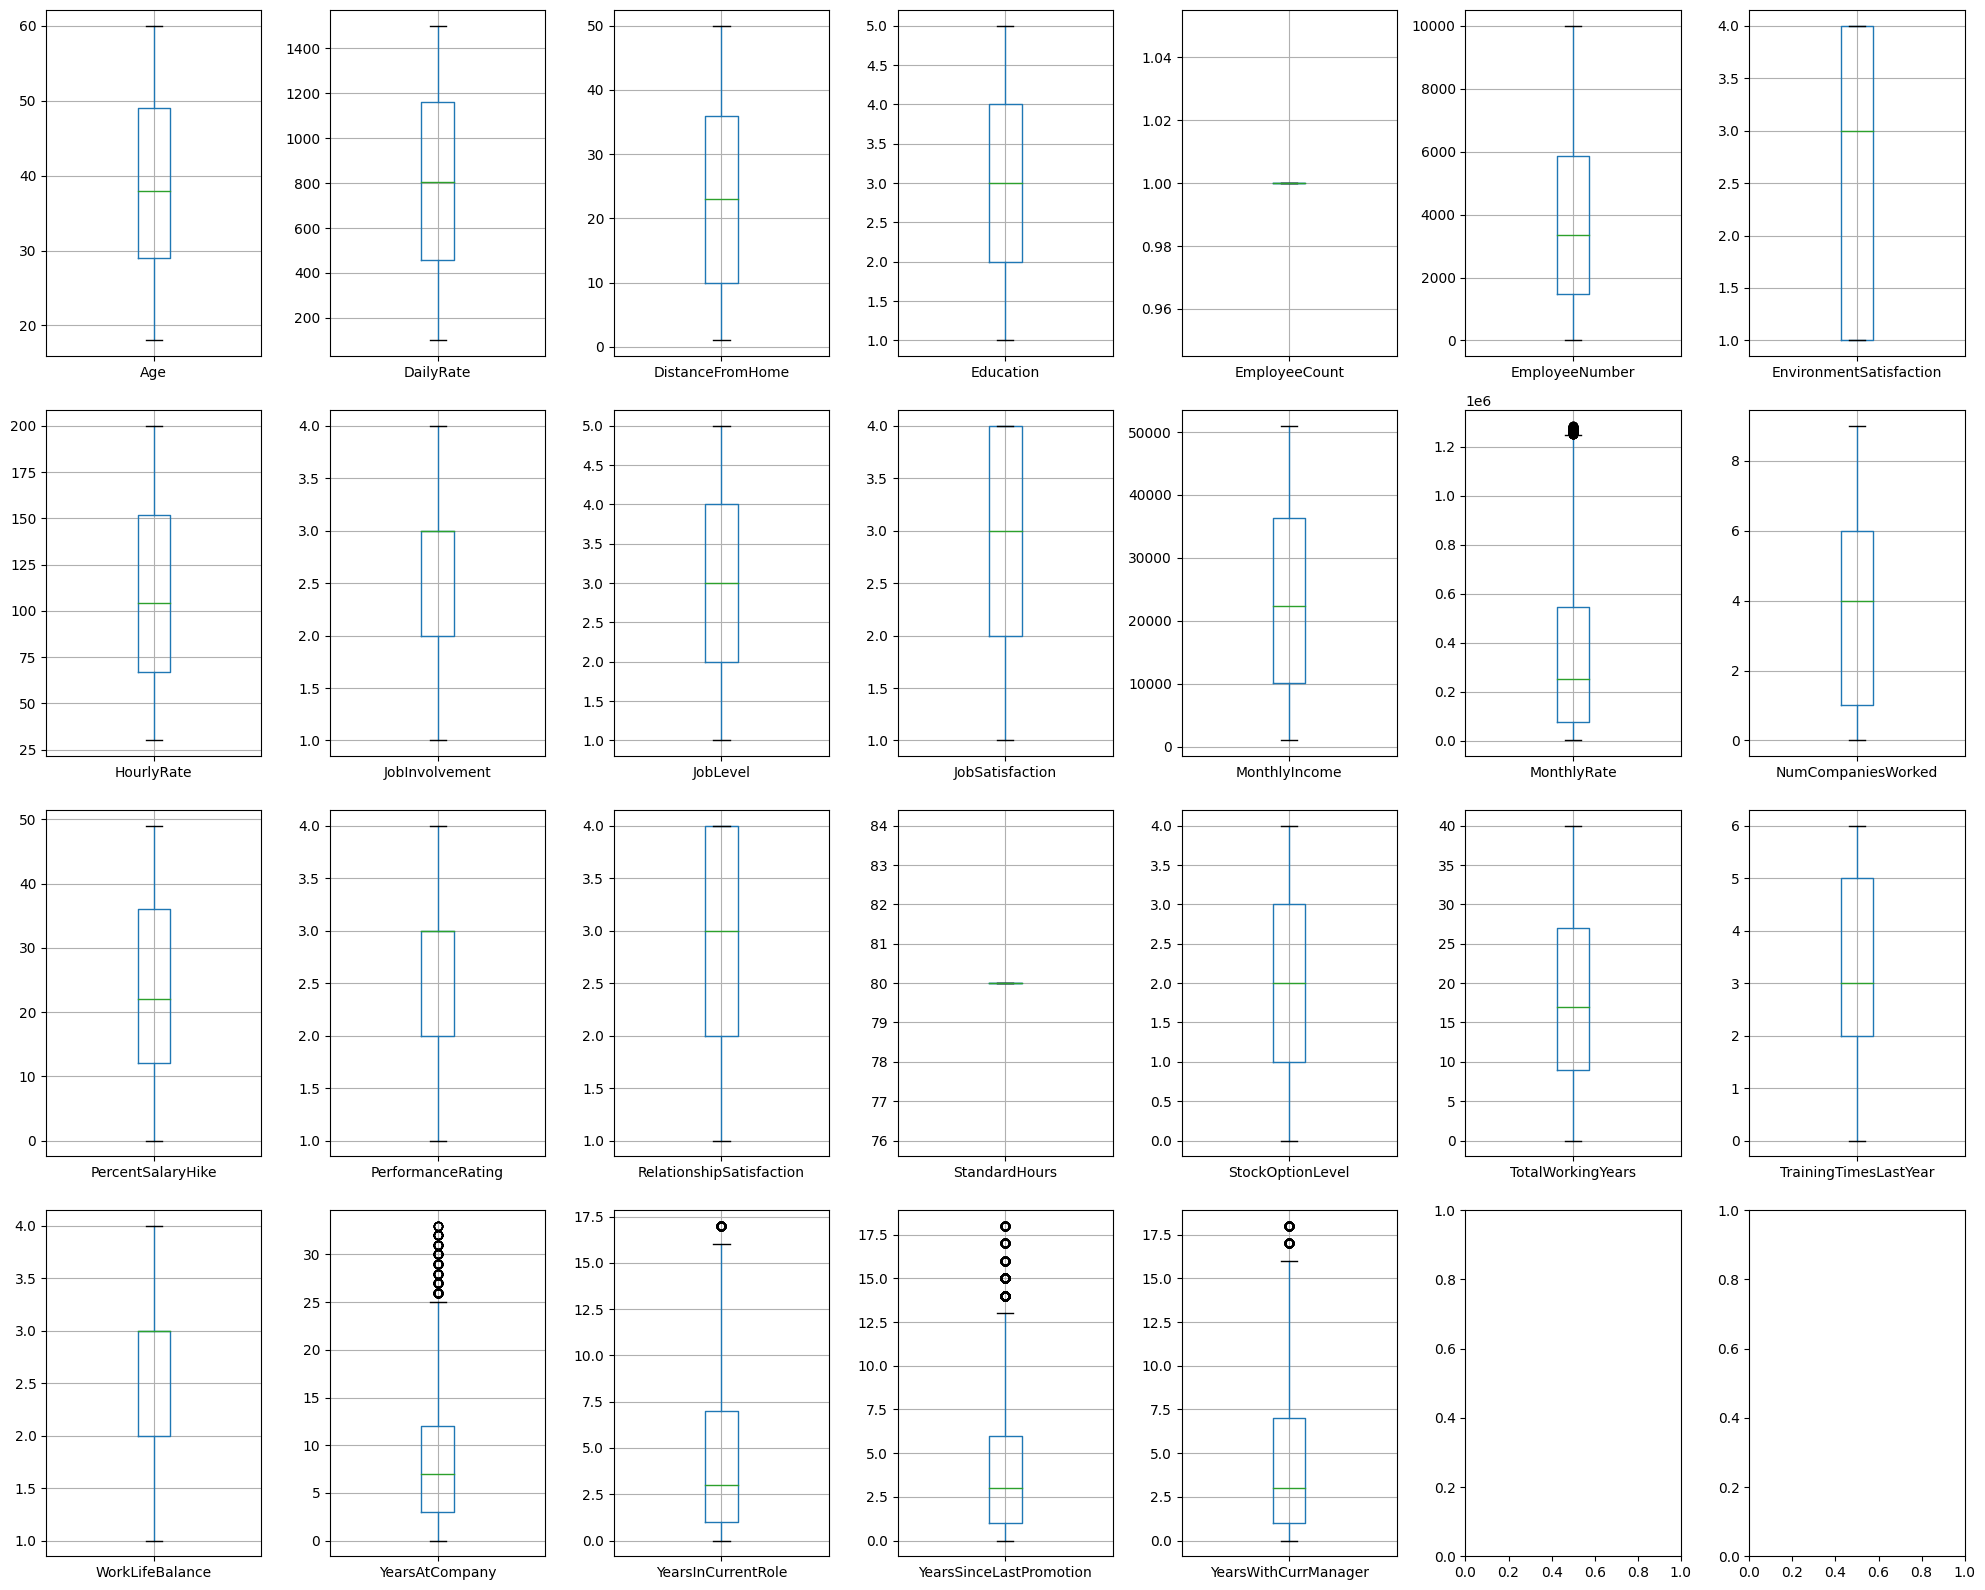

In [ ]:
numerical_columns = data.select_dtypes(include = ["number"]).columns
num_plots = len(numerical_columns)
num_cols = 7
num_rows = -(-num_plots // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize = (20, 4 * num_rows))
for i, column in enumerate(numerical_columns):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    data.boxplot(column = column, ax = ax)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

<font color = "red" >Observation</font>: Trimming outliers was succesfully done without distorting the data balance, evidence from prescence of outliers in <font color = "green">Monthly rate, Years at company, Years since last promotion.</font> etc, since it contains majority of the data observation.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14486 entries, 0 to 16469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14486 non-null  int64  
 1   Attrition                 14486 non-null  object 
 2   BusinessTravel            14486 non-null  object 
 3   DailyRate                 14486 non-null  int64  
 4   Department                14486 non-null  object 
 5   DistanceFromHome          14486 non-null  int64  
 6   Education                 14486 non-null  int64  
 7   EducationField            14486 non-null  object 
 8   EmployeeCount             14486 non-null  int64  
 9   EmployeeNumber            14486 non-null  int64  
 10  EnvironmentSatisfaction   14486 non-null  int64  
 11  Gender                    14486 non-null  object 
 12  HourlyRate                14486 non-null  int64  
 13  JobInvolvement            14486 non-null  int64  
 14  JobLev

### Exploratory Data Analysis <a id = "Exploratory-Data-Analysis"></a>


- Check the correlation of the features in dataset to one another

<AxesSubplot:>

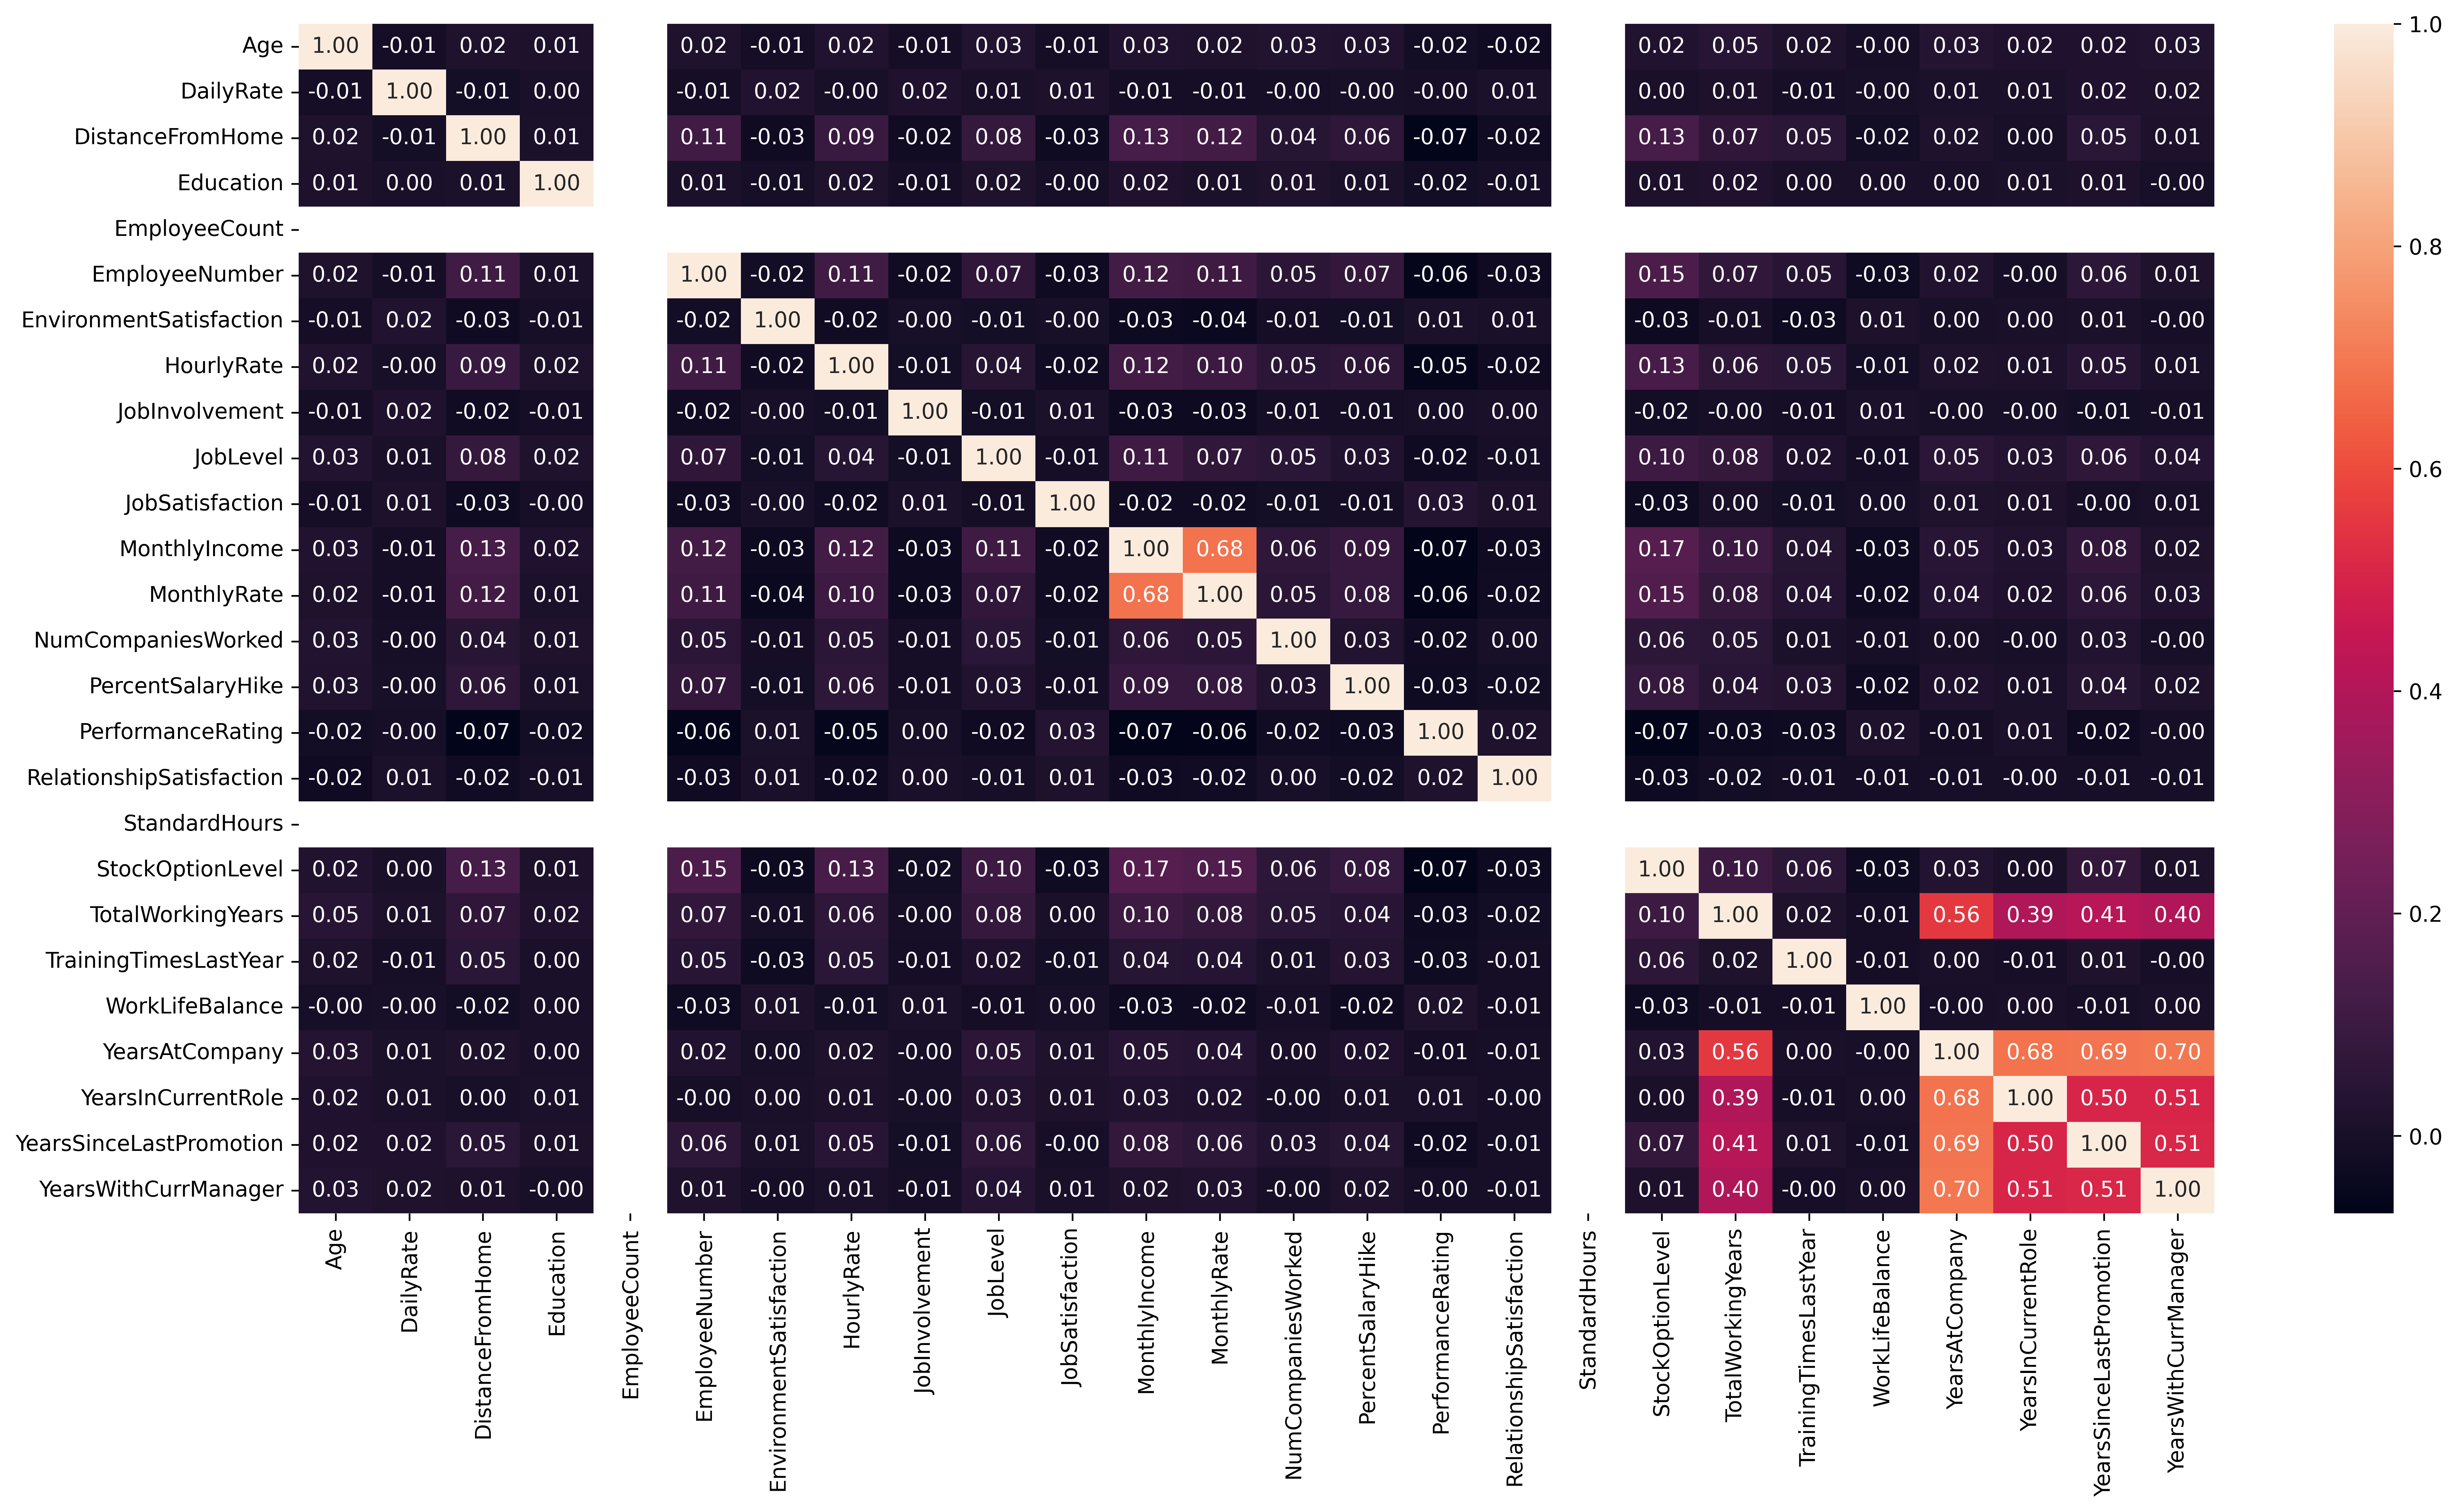

In [ ]:
fig = plt.figure(figsize = (20,10), dpi = 480)
sns.heatmap(data.corr(), annot = True, fmt = '.2f')

<font color = "red" >Observation</font> The correlation of each feature to other features.
- Positive Correlatiion:
    - <font color = "green">Monthly rate</font> and <font color = "green"> Monthly Income </font> have a strong positive correlation
    - <font color = "green">Years at Company</font> and <font color = "green">Years in Current Role</font>
    - <font color = "green">Years with Current Manager</font> and <font color = "green">Years at Company</font>

- Negative Correlaion:
    - <font color = "green">Distance from Home</font> and <font color = "green"> Performance rating </font> have a strong negative correlation
    - <font color = "green">Monthly Income</font> and <font color = "green"> Perfomance rating </font> have a strong negative correlation
    - <font color = "green">Stock option Level </font> and <font color = "green"> Performance rating </font> have a strong negative correlation

# 3. Data Preparation <a id="preparation"></a>

<h3>Feature Selection Method:</h3><a id = "features-selection-method"></a>

**Multiple Feature Selection and Consensus Voting.**  

In our analysis of the HR attrition dataset, we employed a robust approach to feature selection by leveraging the strengths of three distinct machine learning algorithms: Random Forest, XG Boost, and Gradient Boost. Each algorithm was tasked with identifying the most influential factors contributing to attrition within organizations.

The process of multiple feature selection involved running each algorithm independently to rank the features based on their importance scores. Subsequently, we selected the top 12 features identified by each algorithm, resulting in a pool of candidate predictors.

To ensure the selection of the most relevant features, we implemented a consensus voting mechanism. This involved aggregating the top 12 features chosen by each algorithm and identifying those that appeared most frequently across the selections. Features that received the highest number of votes were prioritized for inclusion in the final feature set.

By employing this comprehensive approach, we aimed to mitigate bias inherent in individual algorithms and capture a diverse range of predictors that collectively contribute to attrition dynamics. This methodological rigor enhances the robustness and generalizability of our analysis, empowering stakeholders with actionable insights to address attrition challenges effectively.

- <font color = "red">Feature selection using Multiple Feature Selection and Consensus Voting: 3 machine Learning Algorithms</font>

- Preprocess the data so as to be able to feed it to the algorithms
    - Split the data into X (independent) and y (dependent) dataset
    - Identify Categorical Features
    - Encode the Categorical Features
    - Train the data on the various algorithms

In [ ]:
rows_to_keep = k1Data.index
filtered_data = data[data.index.isin(rows_to_keep)]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1463 non-null   int64  
 1   Attrition                 1463 non-null   object 
 2   BusinessTravel            1463 non-null   object 
 3   DailyRate                 1463 non-null   int64  
 4   Department                1463 non-null   object 
 5   DistanceFromHome          1463 non-null   int64  
 6   Education                 1463 non-null   int64  
 7   EducationField            1463 non-null   object 
 8   EmployeeCount             1463 non-null   int64  
 9   EmployeeNumber            1463 non-null   int64  
 10  EnvironmentSatisfaction   1463 non-null   int64  
 11  Gender                    1463 non-null   object 
 12  HourlyRate                1463 non-null   int64  
 13  JobInvolvement            1463 non-null   int64  
 14  JobLevel

In [ ]:
X = filtered_data.drop("Attrition", axis = 1)
y = filtered_data["Attrition"]

categorical_columns = X.select_dtypes(include = ["object"]).columns

encoder = LabelEncoder()

y = encoder.fit_transform(y)
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded[col] = encoder.fit_transform(X[col])

X_encoded.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0               1              1               1                        2   
1               1              1               2                        3   
2               4              1               4                        4   
3               1              1               5                        4   
4               3              1               7                        1   

   ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  ...                         1             80                 0   
1  ...                         4             80                 1   
2  ...                         2             80                 0   
3  ...                         3             80                 0   
4  ...                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1             6.0   
1                 10                      3                3            10.0   
2                  7                      3                3             0.0   
3                  8                      3                3             8.0   
4                  6                      3                3             2.0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0  

[5 rows x 34 columns]

# 4. Modeling. <a id="Modelling"></a>

- Using Random Forest for Feature Selection
    - Select the top 12 Features

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_encoded, y)

feature_importances = rf.feature_importances_
# Create a DataFrame with feature names and their importance scores
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Select the top 12 features
rf_top_12_features = rf_feature_importance.nlargest(12, 'Importance')['Feature'].tolist()
rf_top_12_features

['MonthlyIncome',
 'Age',
 'OverTime',
 'DailyRate',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyRate',
 'TotalWorkingYears',
 'DistanceFromHome',
 'YearsAtCompany',
 'PercentSalaryHike',
 'YearsWithCurrManager']

- Using Xgboost for Feature Selection
    - Select the top 12 Features

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_encoded, y)
feature_importances = xgb.feature_importances_

top_12_indices = feature_importances.argsort()[-12:]
xgb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

xgb_top_12_features = xgb_feature_importance.nlargest(12, 'Importance')['Feature'].tolist()
xgb_top_12_features

['OverTime',
 'MaritalStatus',
 'StockOptionLevel',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'EnvironmentSatisfaction',
 'TotalWorkingYears',
 'JobInvolvement',
 'YearsSinceLastPromotion',
 'RelationshipSatisfaction',
 'YearsWithCurrManager']

- Using Gradient Boosting for Feature Selection
    - Select the top 12 Features

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_encoded, y)

feature_importances = gb.feature_importances_
gb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Select the top 12 features
gb_top_12_features = gb_feature_importance.nlargest(12, 'Importance')['Feature'].tolist()
gb_top_12_features

['MonthlyIncome',
 'OverTime',
 'Age',
 'StockOptionLevel',
 'JobRole',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'DailyRate',
 'JobLevel',
 'DistanceFromHome',
 'YearsAtCompany',
 'TotalWorkingYears']

- Union of The 3 models Output
    - Combine all features into a single list
    - Count the occurrences of each feature
    - Select features that appear in at least 2 models
    - If there are more than 12 selected features, take the top 12 based on overall importance

In [ ]:
rf_features = ['MonthlyIncome',
 'Age',
 'DailyRate',
 'OverTime',
 'EmployeeNumber',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'PercentSalaryHike',
 'JobRole']

xgb_features = ['OverTime',
 'MaritalStatus',
 'StockOptionLevel',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'EnvironmentSatisfaction',
 'TotalWorkingYears',
 'JobInvolvement',
 'YearsSinceLastPromotion',
 'RelationshipSatisfaction',
 'YearsWithCurrManager']

gb_features = ['MonthlyIncome',
 'OverTime',
 'Age',
 'StockOptionLevel',
 'JobRole',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'DailyRate',
 'JobLevel',
 'DistanceFromHome',
 'YearsAtCompany',
 'TotalWorkingYears']

all_features = rf_features + xgb_features + gb_features

feature_counts = Counter(all_features)

selected_features = [feature for feature, count in feature_counts.items() if count >= 2]

if len(selected_features) > 12:
    # Calculate the total importance for each feature
    total_importance = {}
    for feature in selected_features:
        total_importance[feature] = 0
        if feature in rf_features:
            total_importance[feature] += 1
        if feature in xgb_features:
            total_importance[feature] += 1
        if feature in gb_features:
            total_importance[feature] += 1

    # Select the top 12 features based on total importance
    selected_features = sorted(total_importance, key = total_importance.get, reverse = True)[:12]

print(selected_features)

['MonthlyIncome', 'Age', 'DailyRate', 'OverTime', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'JobRole', 'StockOptionLevel', 'JobLevel', 'EnvironmentSatisfaction', 'JobInvolvement']


## Selected Features <a id="Selected"></a>

In the analysis of the HR attrition dataset, which comprises 35 variables capturing various aspects of employee demographics, job characteristics, and satisfaction levels, feature selection techniques have been employed to discern the most influential factors driving attrition within the company. Through rigorous evaluation using machine learning algorithms (Random Forest, XG Boost, and Gradient Boost), a subset of 12 features has emerged as particularly salient in predicting attrition outcomes:


- MonthlyIncome: The monthly income of the employee.
- Age: The age of the employee.
- DailyRate: The daily rate of pay for the employee.
- OverTime: Indicates whether the employee works overtime or not (Yes/No).
- DistanceFromHome: The distance between the employee's home and workplace.
- TotalWorkingYears: The total number of years the employee has been working.
- YearsAtCompany: The number of years the employee has been with the current company.
- JobRole: The role or position of the employee in the company.
- StockOptionLevel: The level of stock options granted to the employee (1: Low, 2: Medium, 3: High, 0: None).
- JobLevel: The level of the employee's job within the company hierarchy.
- EnvironmentSatisfaction: The satisfaction level of the employee with the work environment (1: Low, 2: Medium, 3: High, 4: Very High).
- JobInvolvement: The level of involvement of the employee in their job (1: Low, 2: Medium, 3: High, 4: Very High).

These 12 variables encapsulate critical aspects of employee attributes, job engagement, and organizational dynamics, shedding light on the primary factors contributing to attrition within the company's workforce.

## Visualize the features <a id ="visualize"></a>

- Subset the data by the selected features
- Add the y (<font color = "green">Attrition</font>) to the selected features

In [ ]:
selected_data = X_encoded[selected_features]
prep_data = pd.concat([selected_data, filtered_data["Attrition"]], axis = 1)
prep_data.head()

MonthlyIncome  Age  DailyRate  OverTime  DistanceFromHome  \
0           5993   41       1102         1                 1   
1           5130   49        279         0                 8   
2           2090   37       1373         1                 2   
3           2909   33       1392         1                 3   
4           3468   27        591         0                 2   

   TotalWorkingYears  YearsAtCompany  JobRole  StockOptionLevel  JobLevel  \
0                  8             6.0        7                 0         2   
1                 10            10.0        6                 1         2   
2                  7             0.0        2                 0         1   
3                  8             8.0        6                 0         1   
4                  6             2.0        2                 1         1   

   EnvironmentSatisfaction  JobInvolvement Attrition  
0                        2               3       Yes  
1                        3               2        No  
2                        4               2       Yes  
3                        4               3        No  
4                        1               3        No

- Function to visualize the selected data as related to Attrition

In [ ]:
def visualize_feature(selected_data, feature):
    fig, axes = plt.subplots(1, 3, figsize = (20, 9))

    # Scatter plot
    axes[0].scatter(selected_data[feature], selected_data['Attrition'], alpha = 0.5)
    axes[0].set_title(f'{feature} vs Attrition', fontsize = 14)
    axes[0].set_xlabel(feature, fontsize = 14)
    axes[0].set_ylabel('Attrition', fontsize = 14)
    axes[0].grid(True)

    # Histogram
    axes[1].hist(selected_data[feature], bins = 20, color = 'skyblue', edgecolor = 'black')
    axes[1].set_title(f'{feature} Histogram', fontsize = 14)
    axes[1].set_xlabel(feature, fontsize = 14)
    axes[1].set_ylabel('Frequency', fontsize = 14)
    axes[1].grid(True)

    # 2. Relationship with attrition (Boxplot)
    data_by_attrition = [selected_data[selected_data['Attrition'] == 'Yes'][feature], selected_data[selected_data['Attrition'] == 'No'][feature]]
    plt.boxplot(data_by_attrition, showmeans = True)
    plt.xticks([1, 2], ['Yes', 'No'])  # Set labels for attrition status
    plt.xlabel('Attrition Status', fontsize = 14)
    plt.ylabel(feature, fontsize = 14)
    plt.title(f'{feature} vs. Attrition', fontsize = 14)
    plt.grid(True)
    plt.show()

- Feature: <font color = "green"> Monthly Income</font>

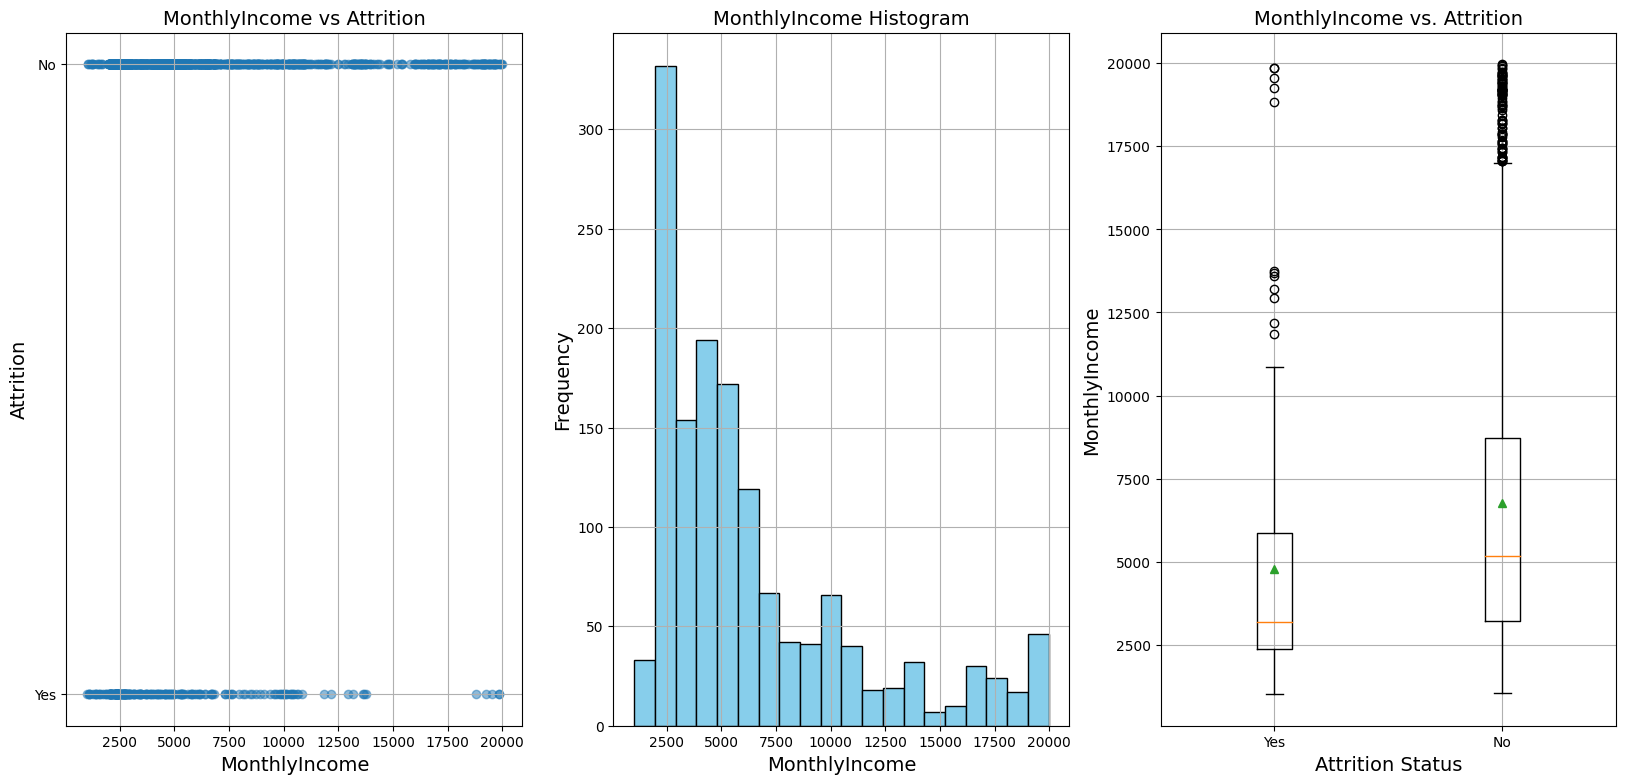

In [ ]:
visualize_feature(prep_data, "MonthlyIncome")

- <font color = "red">Observation:</font>
    - Scatter plot: The central tendency on the <b>No</b> status suggests that a large portion of employees who did not leave have a similar monthly income, there might be a specific income range where most employees who stayed fall within.
        the employees who left the company had a wider range and variability in monthly incomes.
    - Histogram: Shows majority of workers earn in the lower spectrum of the monthly income
    - Box plot: Majority of outliers are observed in the attrition status of the <b>No</b>, which hints at the income disparities between employees who stay and those who leave. It also shows that mean monthly income of those who stay is slightly above 5000, while the mean monthly income for those who leave is just around 2500.

- Feature: <font color = "green"> Age</font>

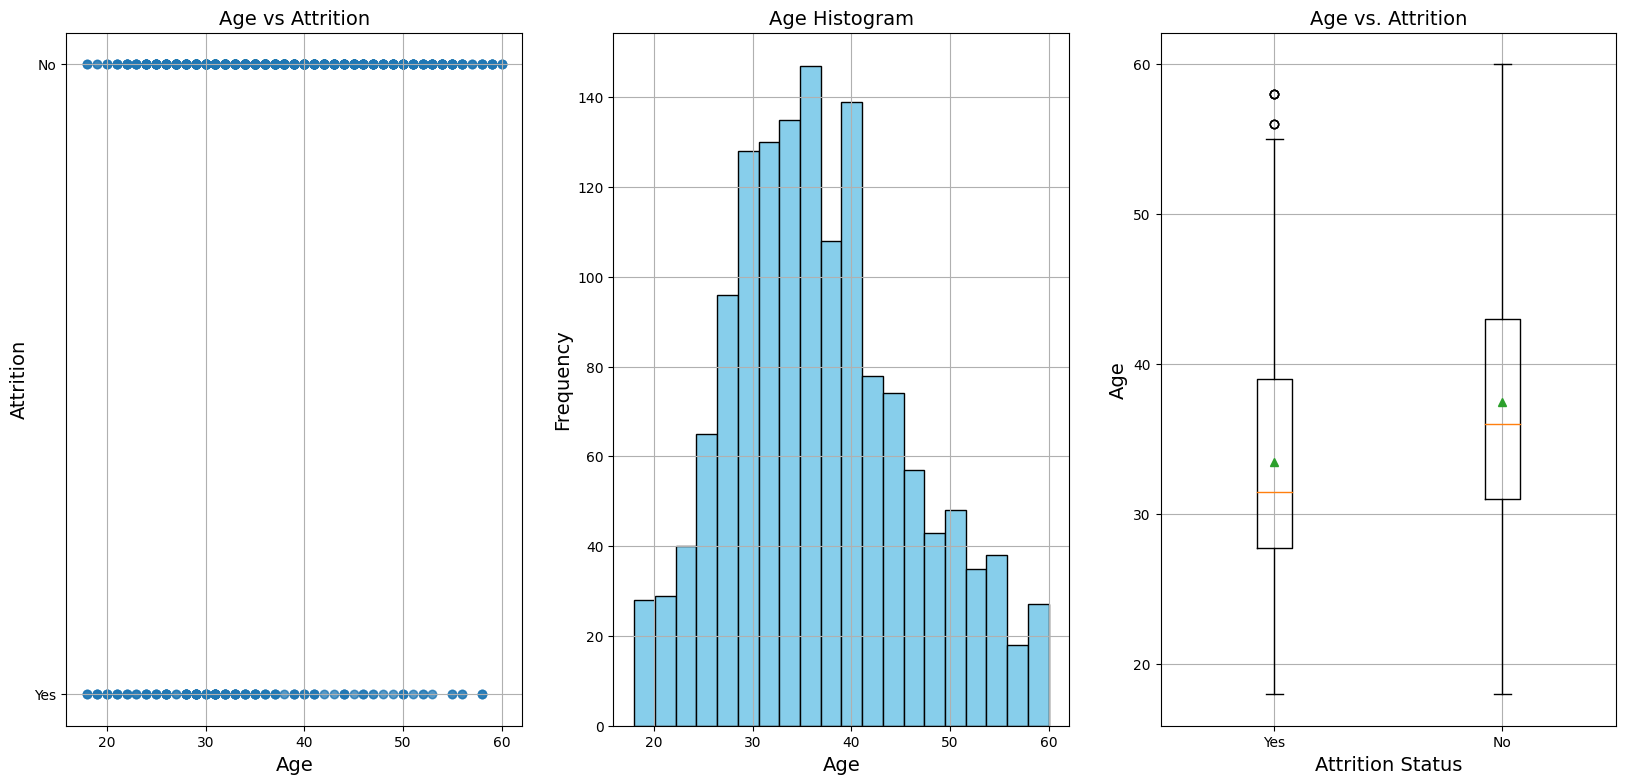

In [ ]:
visualize_feature(prep_data, "Age")

- <font color = "red">Observation:</font>
    - Scatter plot: scatter plot shows a fair distribution of attrition and retention across all ages, but shows more continuity at age points between 50 and 60 for those who stay with the company.
    - Histogram: Shows frequency of workers age, revealing a larger age distribution between ages 30 and 50.
    - Box plot: box plot shows the mean age of those who leave is just slightly above 30, while the mean age of those who stay is well above 30.

- Feature: <font color = "green"> DailyRate</font>

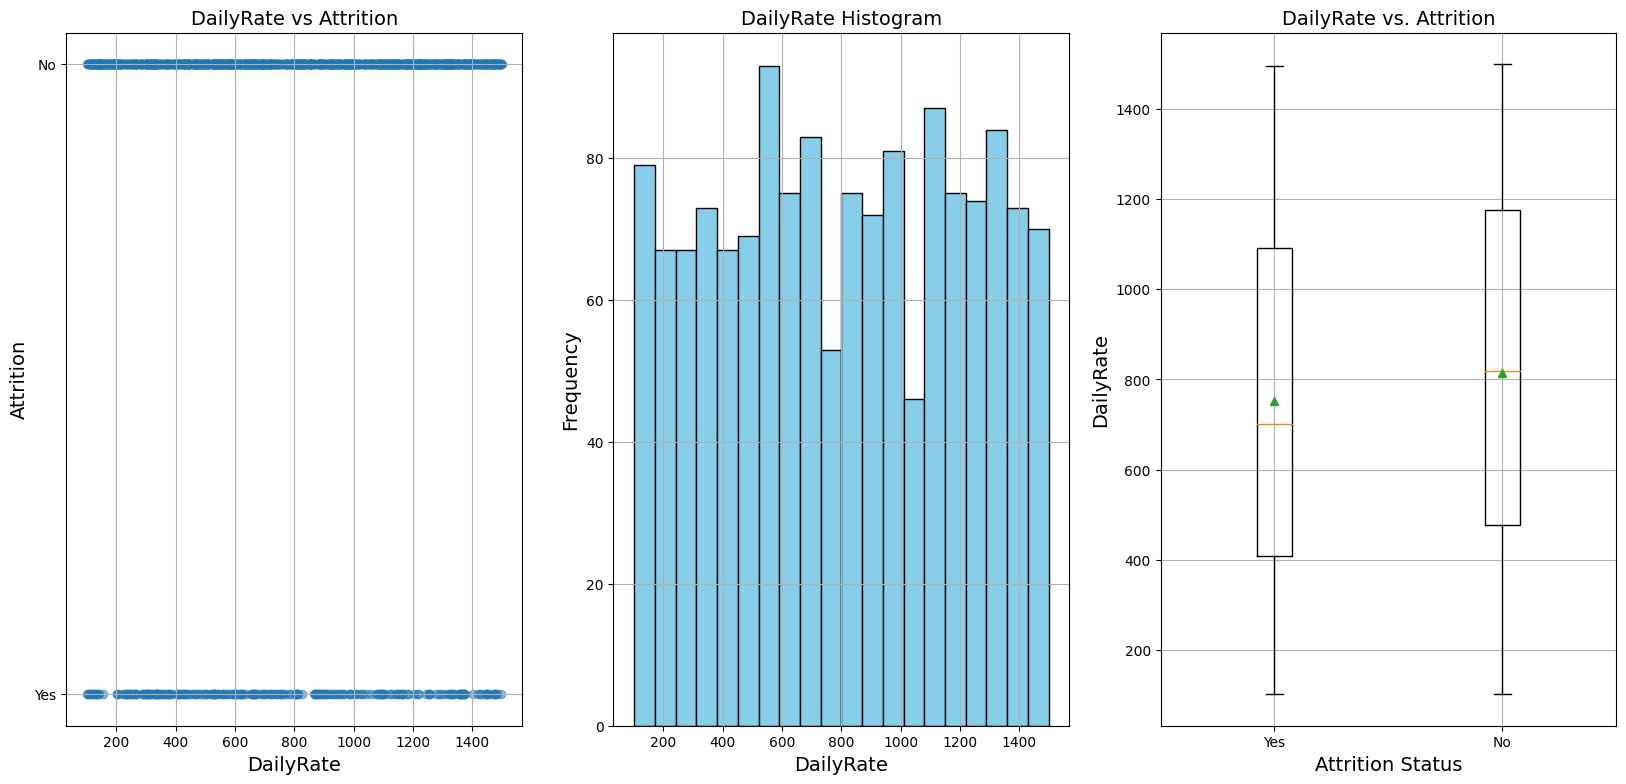

In [ ]:
visualize_feature(prep_data, "DailyRate")

- <font color = "red">Observation:</font>
    - Scatter plot: This suggests a positive linear relationship between daily rate and Attrition. Employees with higher daily rates are more likely to stay.
    - Histogram: Shows frequency of the daily rate
    - Box plot: Boxplot shows that the mean daily rate of employees who leave is around 700, while the mean daily rate for those who stay is slightly above 800.

- Feature: <font color = "green"> DistanceFromHome</font>

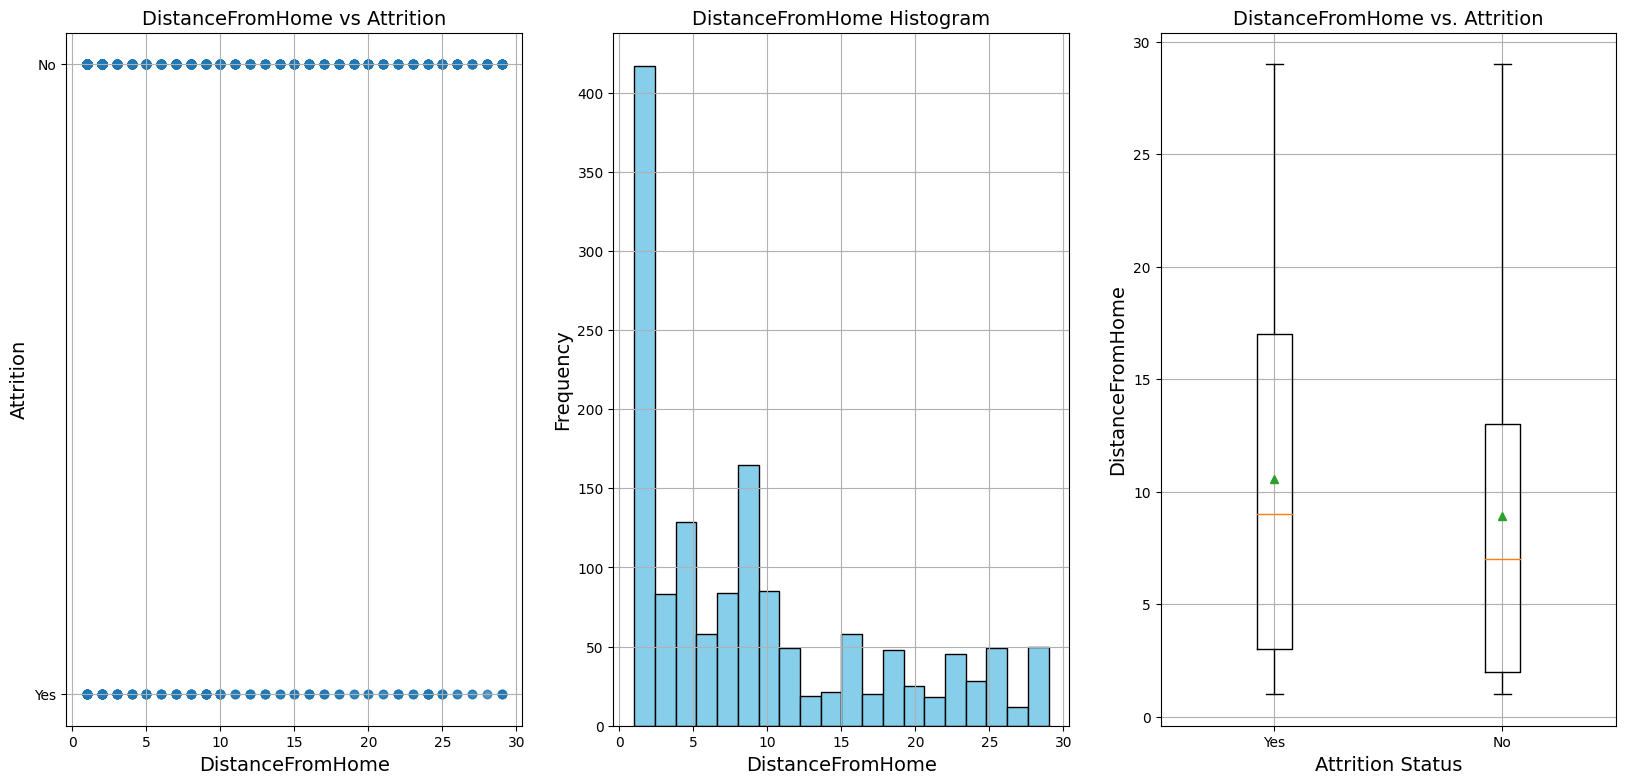

In [ ]:
visualize_feature(prep_data, "DistanceFromHome")

- <font color = "red">Observation:</font>
    - Scatter plot: Having slightly more concentrated clusters in the "No" attrition group indicates that a larger portion of employees who stayed with the company lived at various distances from their workplace
    - Histogram: Shows majority of the employees stays close to the company
    - Box plot: Shows higher mean distance from home for those who leave the company.

- Feature: <font color = "green"> TotalWorkingYears</font>

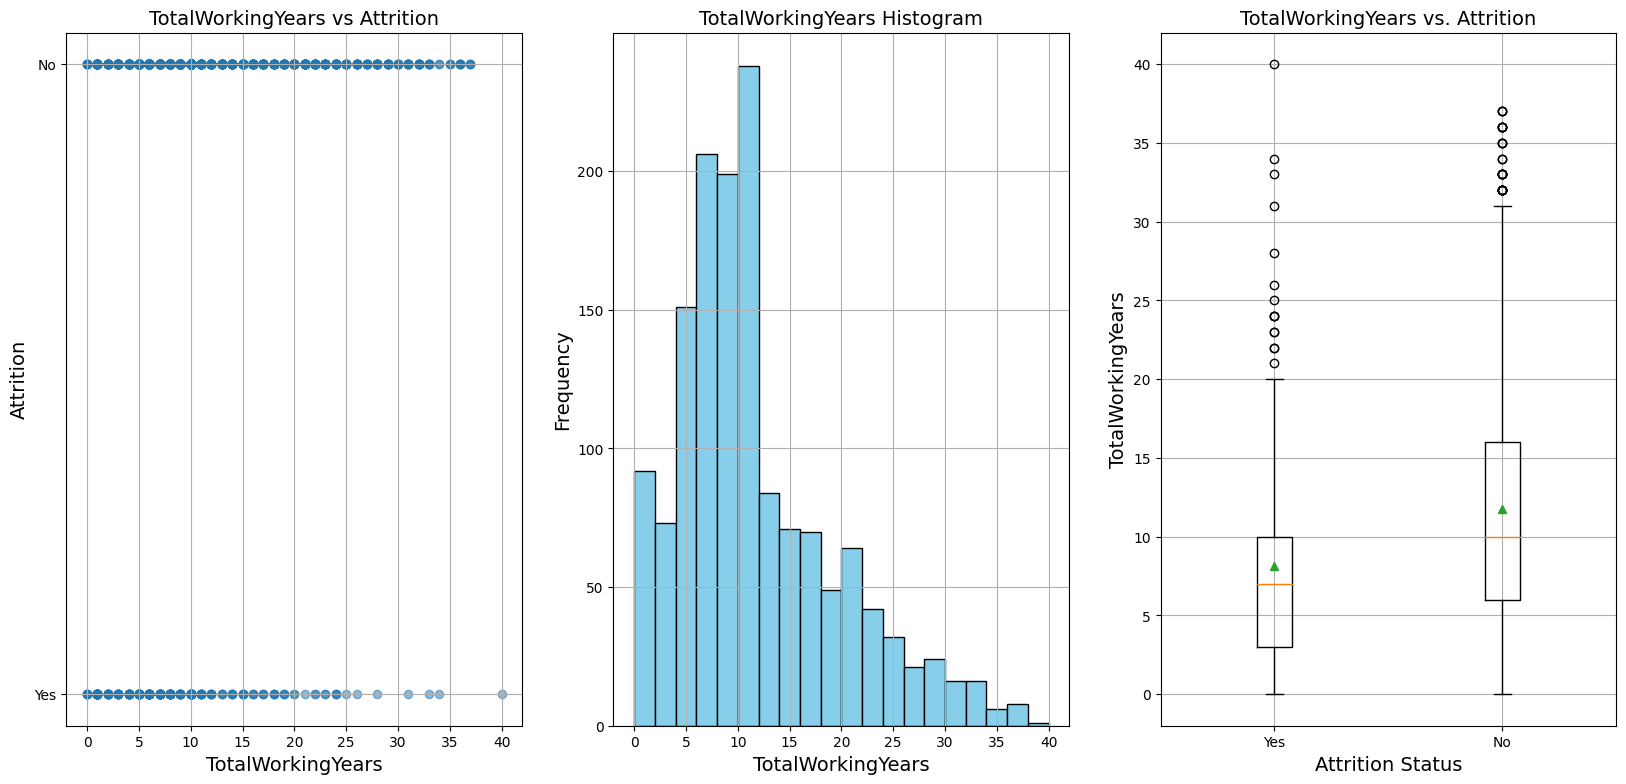

In [ ]:
visualize_feature(prep_data, "TotalWorkingYears")

- <font color = "red">Observation:</font>
    - Scatter plot: Having more points in the "No" attrition group indicates that a larger portion of employees stayed with the company for various lengths of tenure.
    - Histogram: Shows majority of the employees stays with the companies for 5 to 15 years
    - Box plot: Shows the mean value of total working years for employee who leave the company is below 10 years, while the mean value of working years for those who stay is exactly 10 years

- Feature: <font color = "green"> YearsAtCompany</font>

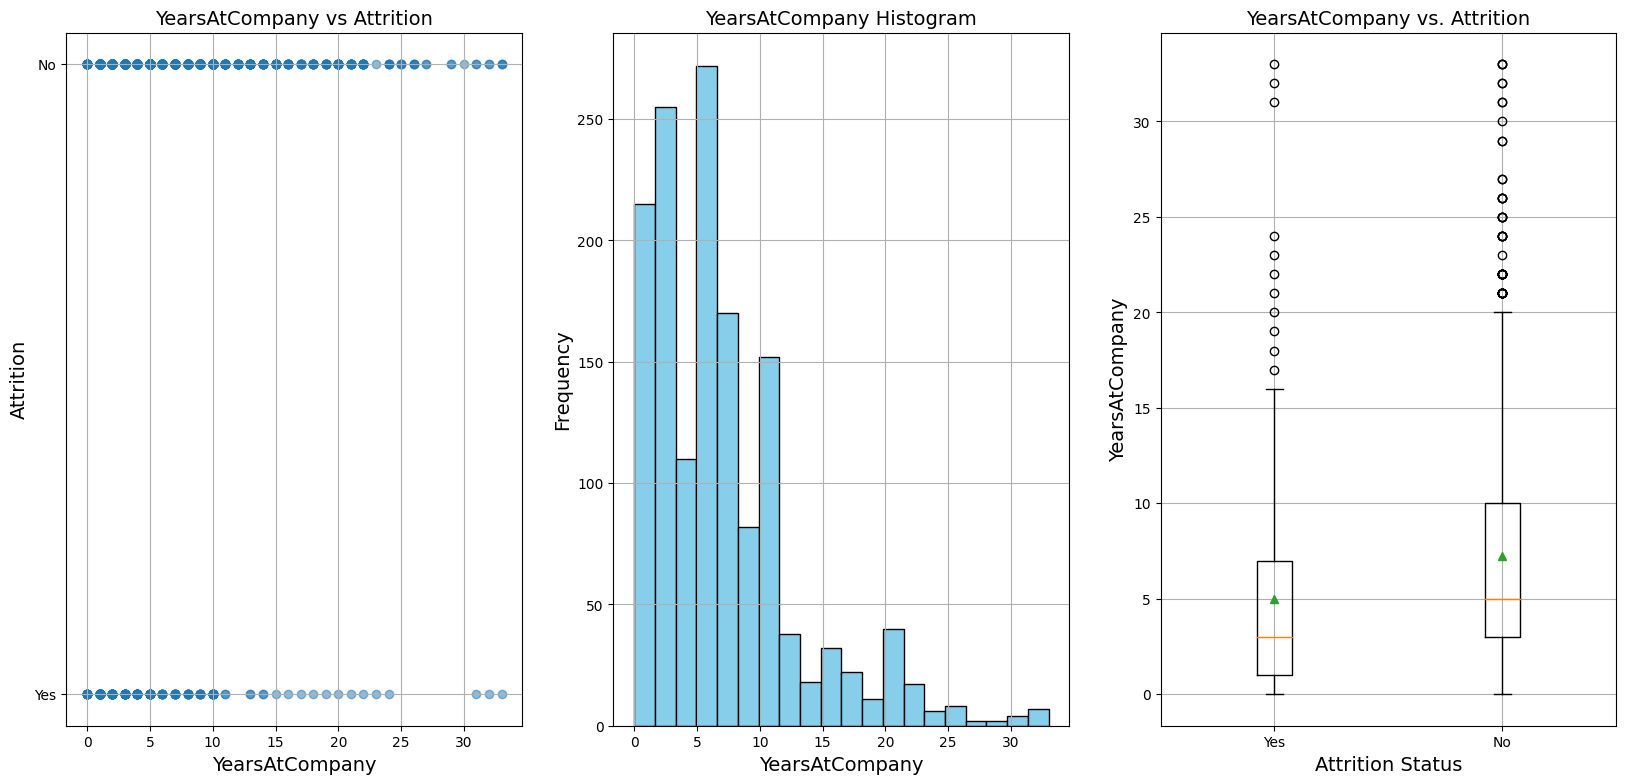

In [ ]:
visualize_feature(prep_data, "YearsAtCompany")

- <font color = "red">Observation:</font>
    - Scatter plot: Having slightly more points in the "No" attrition group indicates that a  portion of employees stayed with the company for some years
    - Histogram: Shows a higher distribution for employees who stayed with the company between 1 to 10 years.
    - Box plot: shows that the mean years at the company is lower than 5 years for those who attrite, while the mean value for those who don't is exactly 5 years. Hence, it's less likely for employees who have worked for up to 5 years at the company to leave.

- Feature: <font color = "green"> StockOptionLevel</font>

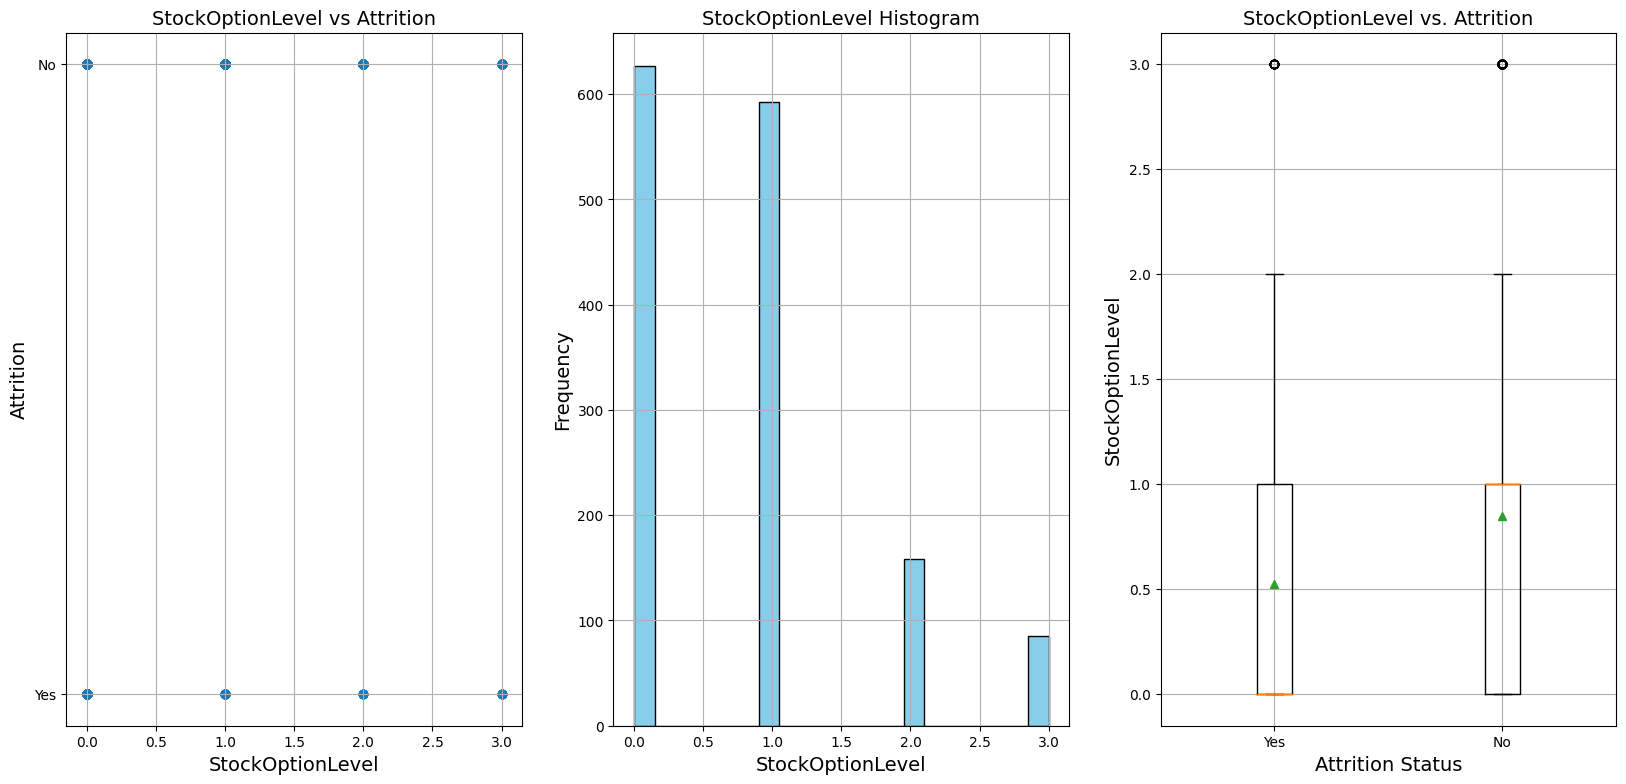

In [ ]:
visualize_feature(prep_data, "StockOptionLevel")

- <font color = "red">Observation:</font>
    - Scatter plot: scatterplot shows that attrition happens across employees whatever their stock option levels, whether low, medium, high or none.
    - Histogram: Histogram shows that the majority of workers at the company are either granted no stock option or low stock option.
    - Box plot: Box plot shows that the bulk of workers who attrite where offered no stock option, while the mean value of those who remain at the company had at least low stock option granted them.
    


- Feature: <font color = "green"> JobLevel</font>

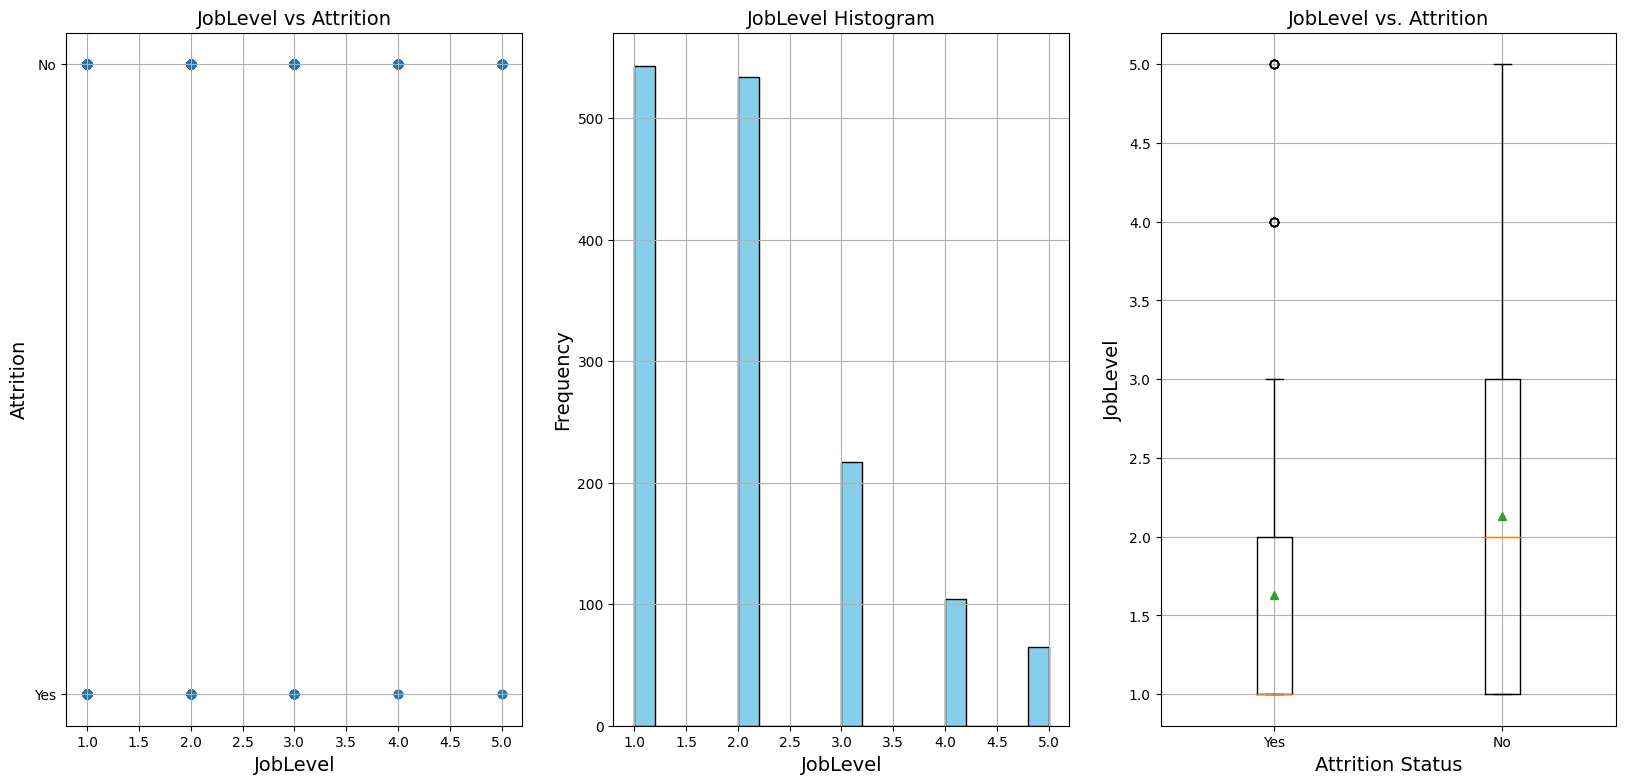

In [ ]:
visualize_feature(prep_data, "JobLevel")

- <font color = "red">Observation:</font>
    - Scatter plot: scatterplot shows that attrition happens across employees, whatever their job levels; whether low, medium, high or none
    - Histogram: Shows higher distribution of employers between job levels 1 and 2.
    - Box plot: Box plot shows that the mean value of workers who attrite are at level 1, while the mean value of those who remain at the company were at level 2.
    

- Feature: <font color = "green"> EnvironmentSatisfaction</font>

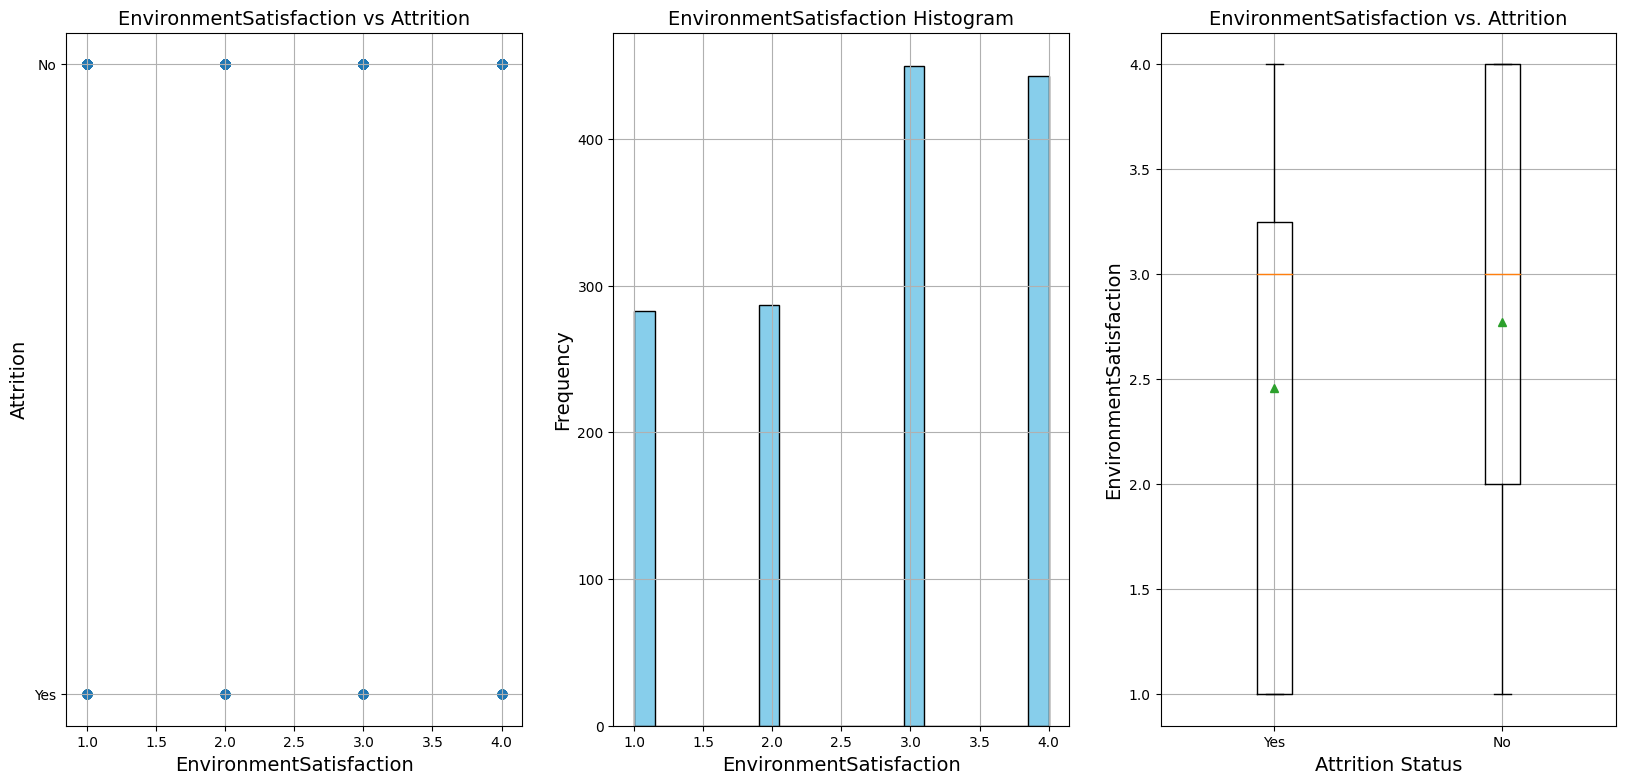

In [ ]:
visualize_feature(prep_data, "EnvironmentSatisfaction")

- <font color = "red">Observation:</font>
    - Scatter plot: scatterplot shows that attrition happens across employees, whatever their work environment satisfaction level; whether low, medium, high or very high.
    - Histogram: Histogram shows a higher distribution of employers between the high and very high environmental satisfaction level.
    - Box plot: box plot shows that the mean environmental satisfaction between employees who attrite and those who don't are the same, which is high. Hence, the employees are relatively satisfied with their work environment and are not staying or leaving because of their environmental satisfaction.
    

- Feature: <font color = "green"> JobInvolvement</font>

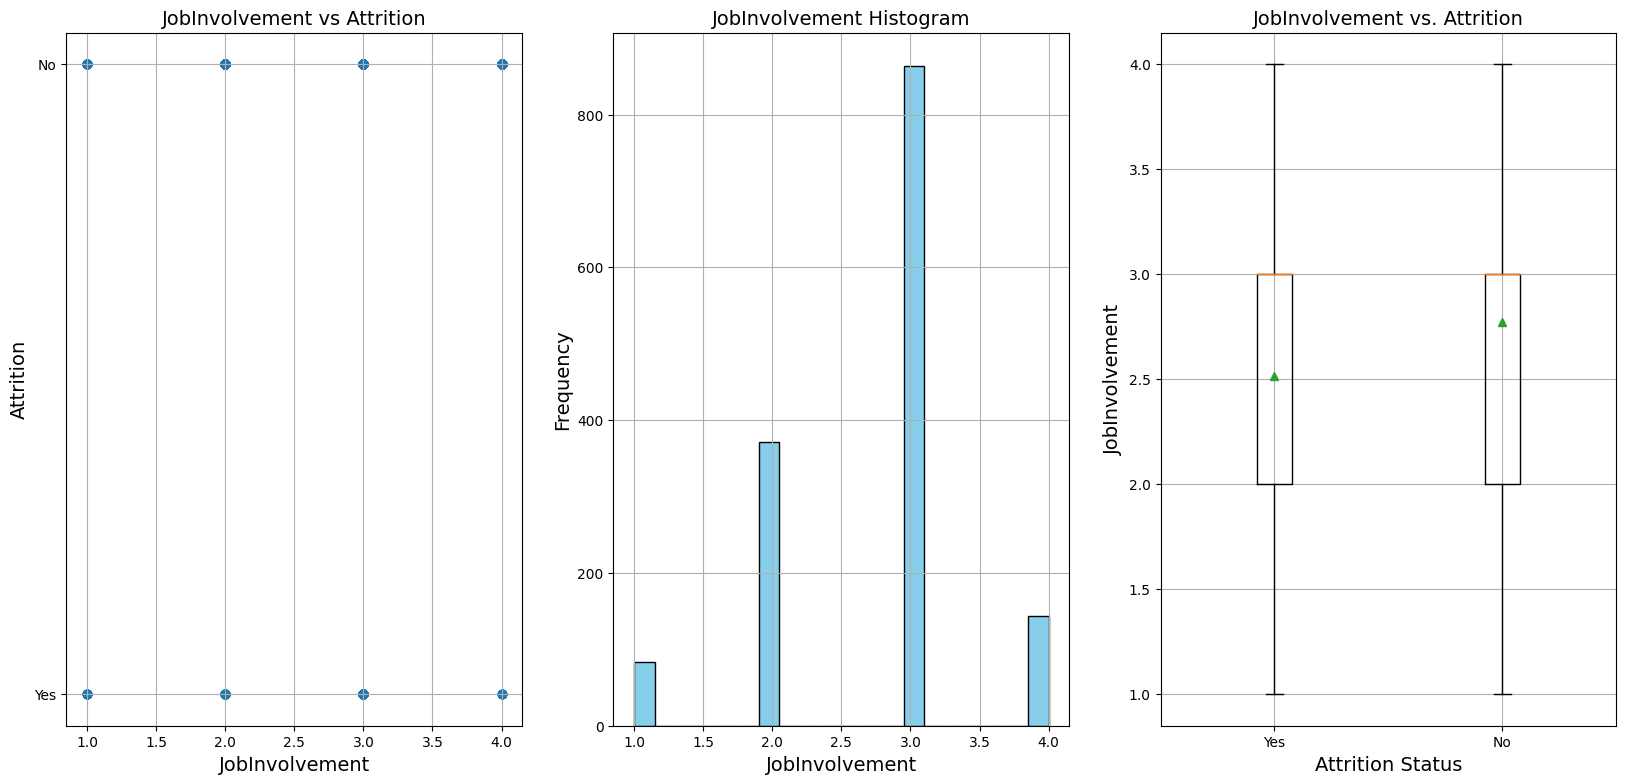

In [ ]:
visualize_feature(prep_data, "JobInvolvement")

- <font color = "red">Observation:</font>
    - Scatter plot: scatterplot shows that attrition happens across employees, whatever their level of job involvement; whether low, medium, high or very high.
    - Histogram: histogram shows the highest distribution at employees with high job involvement, followed by employees with medium job involvment level
    - Box plot: box plot reveals that the same mean level of job involvement between employees who attrite and those who don't, which is high level involvement.
    

## Further Analysis Using Pivot Tables <a id = "tables"></a>

### Function to visualize Pivot tables

In [ ]:
import matplotlib.pyplot as plt

def visualize_mean_median(data, xlabel=None, ylabel=None, title=None):

    # Extracting x values (years) and corresponding statistics
    x_values = data.index
    mean_values = data['mean']
    median_values = data['median']

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, mean_values, marker='o', label='Mean')
    plt.plot(x_values, median_values, marker='s', label='Median')

    # Adding labels and title if provided
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)

    # Adding legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()



### Tab1: Mean and Median Monthly Rate by Years at Company.

In [ ]:
pivot_table_1 = pd.pivot_table(data, values = "MonthlyRate",  index = "YearsAtCompany" , aggfunc = ['mean', 'median', lambda x: x.mode().iloc[0]])
pivot_table_1

mean      median    <lambda>
                  MonthlyRate MonthlyRate MonthlyRate
YearsAtCompany                                       
0.0              14328.363636     14092.5      2396.0
1.0             347791.391776    249041.0      7324.0
2.0             347087.813272    255508.5     21240.0
3.0             329175.933500    235440.0     10494.0
4.0             345800.758454    261521.0      6881.0
5.0             311428.700828    227002.5     36954.0
6.0             353894.292035    268560.0      2253.0
7.0             352614.509554    257805.0      1054.0
8.0             322963.417974    230352.0     24676.0
9.0             338613.933649    233240.0      1778.0
10.0            325508.382883    206531.0     55740.0
11.0            358525.957249    252124.5      4053.0
12.0            389418.048000    299014.5      1400.0
13.0            389860.371179    293006.0      2155.0
14.0            370481.148402    289589.5      2288.0
15.0            373316.805353    267744.0      2261.0
16.0            392371.529745    299222.0      2323.0
17.0            372718.917333    301888.0      4730.0
18.0            373261.625407    315840.0      2529.0
19.0            373690.760163    257887.5      6420.0
20.0            375806.353234    295678.0      2326.0
21.0            340736.490323    251440.0      2354.0
22.0            370993.746269    253300.5      1245.0
23.0            447925.509615    337906.0      3395.0
24.0            271317.827160    198906.0      2137.0
25.0            305900.738462    192426.0      4345.0
26.0            379399.951613    290256.5      3156.0
27.0            407780.717391    358595.0      9314.0
28.0            353693.241379    279950.0     33553.0
29.0            270100.216216    154504.0      3854.0
30.0            365323.153846    293150.0     13930.0
31.0            341119.640000    187893.0      2125.0
32.0            365692.470588     56944.0      7999.0
33.0             73260.571429     25592.0     14618.0

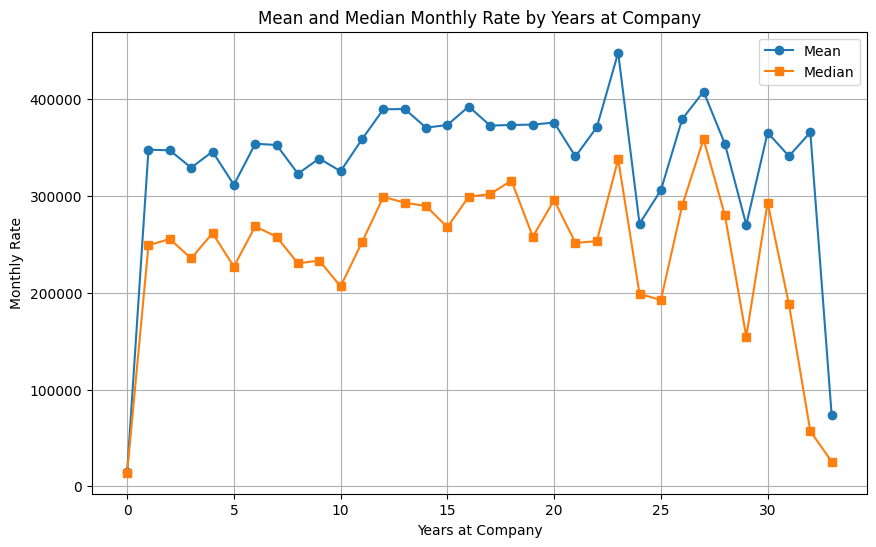

In [ ]:
visualize_mean_median(pivot_table_1, xlabel='Years at Company', ylabel='Monthly Rate', title='Mean and Median Monthly Rate by Years at Company')

<font color = "red">Observation:</font>

- The pivot table provides a summary of the central tendency of MonthlyRate values for different YearsAtCompany groups, allowing for a deeper understanding of the relationship between these variables in the dataset

- There appears to be a general trend where MonthlyRate tends to increase with YearsAtCompany up to a certain point, after which it may fluctuate or decrease.

- Employees who have been with the company for a longer time (higher YearsAtCompany) may have higher MonthlyRate values on average, which could be due to factors such as seniority, experience, or performance-based salary increases.

- The mode (lambda) provides insight into the most common MonthlyRate within each YearsAtCompany group. Comparing the mode to the mean and median give indication of the distribution of MonthlyRate values within each group.

### Tab2: Mean and Median Performance Rating by Distance from Home

In [ ]:
pivot_table_2 = pd.pivot_table(data, values = "PerformanceRating",  index = "DistanceFromHome" , aggfunc = ['mean', 'median', lambda x: x.mode().iloc[0]])
pivot_table_2

mean            median          <lambda>
                 PerformanceRating PerformanceRating PerformanceRating
DistanceFromHome                                                      
1                         2.757028               3.0                 3
2                         2.783726               3.0                 3
3                         2.696023               3.0                 3
4                         2.618462               3.0                 3
5                         2.692771               3.0                 3
6                         2.572727               3.0                 3
7                         2.644205               3.0                 3
8                         2.751572               3.0                 3
9                         2.708571               3.0                 3
10                        2.746398               3.0                 3
11                        2.471154               3.0                 3
12                        2.583618               3.0                 3
13                        2.622137               3.0                 3
14                        2.612319               3.0                 3
15                        2.594502               3.0                 3
16                        2.496689               3.0                 3
17                        2.684783               3.0                 3
18                        2.613383               3.0                 3
19                        2.515050               3.0                 3
20                        2.430769               3.0                 3
21                        2.634241               3.0                 3
22                        2.586572               3.0                 4
23                        2.564286               3.0                 3
24                        2.638989               3.0                 3
25                        2.571930               3.0                 3
26                        2.627737               3.0                 3
27                        2.464684               2.0                 1
28                        2.552288               3.0                 3
29                        2.500000               3.0                 3
30                        2.564286               3.0                 4
31                        2.575397               3.0                 3
32                        2.429167               2.0                 2
33                        2.536496               3.0                 1
34                        2.500000               3.0                 3
35                        2.450820               2.0                 1
36                        2.572993               3.0                 3
37                        2.414062               2.0                 1
38                        2.453846               2.0                 2
39                        2.476744               2.0                 2
40                        2.483146               2.0                 4
41                        2.511278               3.0                 3
42                        2.480000               2.0                 2
43                        2.566038               3.0                 3
44                        2.553435               2.5                 4
45                        2.463415               3.0                 3
46                        2.485597               3.0                 1
47                        2.468000               3.0                 1
48                        2.485597               2.0                 2
49                        2.551020               3.0                 2
50                        2.392593               2.0                 1

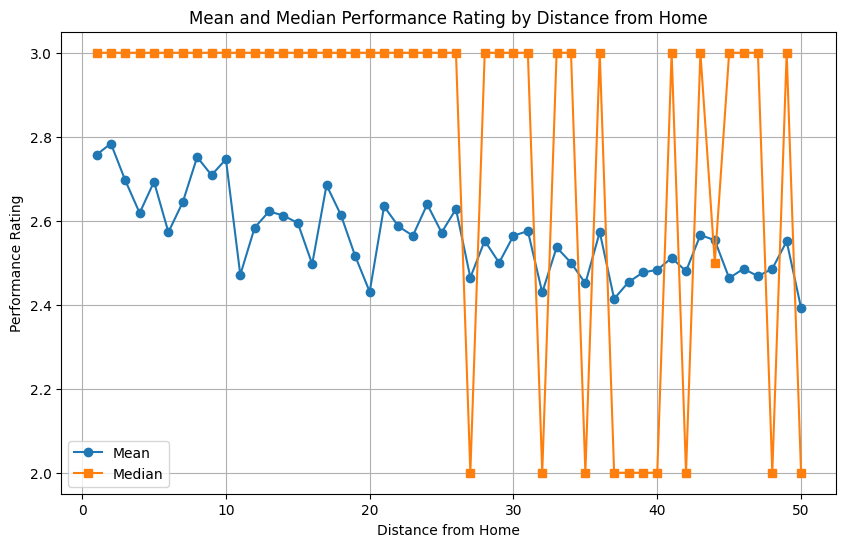

In [ ]:
visualize_mean_median(pivot_table_2, xlabel='Distance from Home', ylabel='Performance Rating', title='Mean and Median Performance Rating by Distance from Home')

<font color = "red">Observation:</font>

From the mode values, we can indeed see that as the <font color = "green"> DistanceFromHome</font> increases, there are instances where the mode <font color = "green"> PerformanceRating</font>  decreases from 3 to 1 or 2. <br>
This suggests that there may be a trend where employees who live farther away from the workplace are more likely to receive lower performance ratings.<br>
This could be due to factors such as longer commute times leading to fatigue or lower job satisfaction, which may impact performance.

### Tab 3: Mean and Median Monthly Rate by Age

In [ ]:
pivot_table_3 = pd.pivot_table(data, values = "MonthlyRate",  index = "Age" , aggfunc = ['mean', 'median', lambda x: x.mode().iloc[0]])
pivot_table_3

mean      median    <lambda>
       MonthlyRate MonthlyRate MonthlyRate
Age                                       
18   398087.471380    317225.0    198198.0
19   393662.510714    326207.0      6148.0
20   375391.763889    301995.0      4896.0
21   359802.887640    280274.0     65360.0
22   391606.672078    312803.0      4223.0
23   344211.400000    257777.0      3445.0
24   372844.106383    268272.0      2097.0
25   358186.630952    268151.5      1568.0
26   333658.912568    230641.0    765018.0
27   310187.956395    220386.0      2107.0
28   348129.681704    265412.0      2122.0
29   326089.082011    205093.0      2030.0
30   341775.589812    223380.0    597350.0
31   311239.172043    236789.0      4156.0
32   297186.219585    203819.0      2338.0
33   334302.245989    252909.0      2993.0
34   305086.979381    193508.0     10034.0
35   314396.633423    183232.0      2155.0
36   295260.514535    192031.5      1443.0
37   331455.207977    230912.0     90435.0
38   340481.579387    219260.0      2150.0
39   320829.274457    196214.0      2560.0
40   331141.891813    254790.0     25800.0
41   339716.805851    267669.0      3735.0
42   346592.884393    251638.0      2253.0
43   332248.237500    260722.5      1245.0
44   342662.400000    242280.0    178684.0
45   362089.639053    299385.5      2493.0
46   344374.035821    228694.0      2137.0
47   358989.620482    271919.5      2125.0
48   382984.656716    270572.0      2081.0
49   348505.573620    272199.5    391300.0
50   342675.539634    240241.5      2755.0
51   352073.621701    260860.0     22984.0
52   373979.679487    302041.0      3300.0
53   384886.068966    288432.0      3458.0
54   396713.158385    295616.0      2131.0
55   346604.384146    217280.5      2854.0
56   380184.064516    283636.0      3666.0
57   392064.834891    302005.0      2476.0
58   349416.948220    261440.0    526320.0
59   353599.764912    256120.0      1270.0
60   378967.632653    289709.0      2845.0

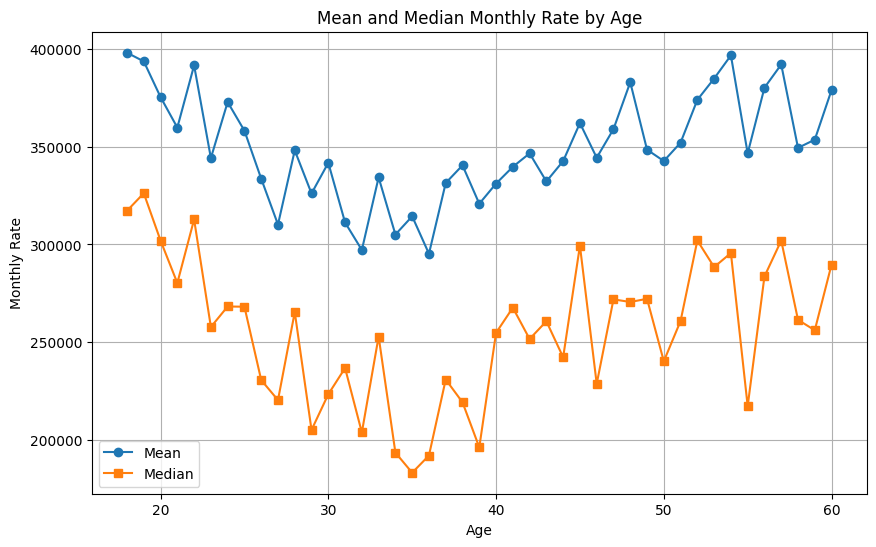

In [ ]:
visualize_mean_median(pivot_table_3, xlabel='Age', ylabel='Monthly Rate', title='Mean and Median Monthly Rate by Age')

<font color = "red">Observation:</font>

- There seems to be some variability in <font color = "green"> MonthlyRate</font> across different age groups, with the mean and median MonthlyRate values fluctuating.
- There are instances where the mean <font color = "green"> MonthlyRate</font> is significantly higher or lower than the median <font color = "green"> MonthlyRate</font> , indicating potential outliers in the data.
- The mode <font color = "green"> MonthlyRate</font>  values are relatively stable across different age groups, except for some occasional fluctuations. This suggests that certain <font color = "green"> MonthlyRate</font>  values occur more frequently within each age group.

### Tab 4: Overtime by Mean and Median Monthly Income.

In [ ]:
pivot_table_4 = pd.pivot_table(data, values = "MonthlyIncome",  index = "OverTime" , aggfunc = ['mean', 'median', lambda x: x.mode().iloc[0]])
pivot_table_4

mean        median      <lambda>
         MonthlyIncome MonthlyIncome MonthlyIncome
OverTime                                          
No        22881.908385         21421          9392
Yes       24324.967339         23408          1601

<font color = "red">Observation:</font>

- The mean and median <font color = "green"> MonthlyIncome</font> values are higher for employees who work overtime (OverTime = Yes) compared to those who do not work overtime (OverTime = No). This suggests that working overtime is associated with higher income.
- The most common <font color = "green"> MonthlyIncome</font> value is higher for employees who do not work overtime (OverTime = No) compared to those who do work overtime (OverTime = Yes). This indicates that a specific income level is more common among employees who do not work overtime.

### Tab 5: Mean and Median Percentage Salary Hike by Years at Company.

In [ ]:
pivot_table_5 = pd.pivot_table(data, values = "PercentSalaryHike",  index = "YearsAtCompany" , aggfunc = ['mean', 'median', lambda x: x.mode().iloc[0]])
pivot_table_5

mean            median          <lambda>
               PercentSalaryHike PercentSalaryHike PercentSalaryHike
YearsAtCompany                                                      
0.0                    15.454545              15.0                12
1.0                    23.532838              22.0                14
2.0                    23.496142              22.0                11
3.0                    23.144638              21.0                11
4.0                    23.576812              22.0                11
5.0                    22.616977              20.0                13
6.0                    23.692794              22.0                13
7.0                    23.342675              22.0                13
8.0                    23.298146              22.0                14
9.0                    22.974724              21.0                14
10.0                   23.408408              22.0                11
11.0                   24.602230              23.0                14
12.0                   25.548000              27.0                13
13.0                   23.262009              22.0                 2
14.0                   24.422374              24.0                 9
15.0                   23.941606              23.0                15
16.0                   25.229462              25.0                20
17.0                   24.749333              25.0                35
18.0                   23.690554              23.0                11
19.0                   24.243902              23.0                12
20.0                   23.796020              21.0                14
21.0                   23.161290              22.0                28
22.0                   24.208955              25.0                12
23.0                   24.259615              24.5                 0
24.0                   24.950617              25.0                18
25.0                   20.184615              19.0                24
26.0                   24.161290              23.0                 9
27.0                   21.086957              16.5                12
28.0                   25.620690              28.0                 3
29.0                   22.000000              20.0                 3
30.0                   23.423077              22.0                 4
31.0                   25.120000              25.0                17
32.0                   24.941176              23.0                11
33.0                   19.857143              16.0                18

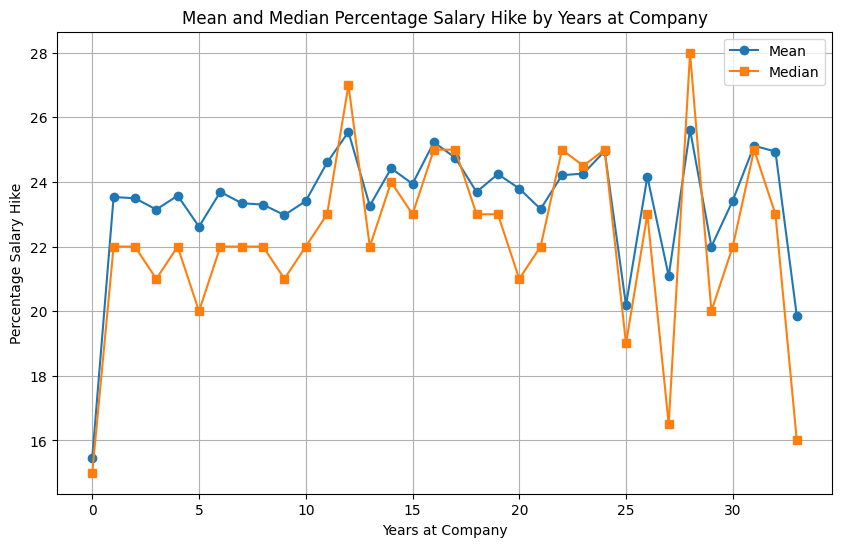

In [ ]:
visualize_mean_median(pivot_table_5, xlabel='Years at Company', ylabel='Percentage Salary Hike', title='Mean and Median Percentage Salary Hike by Years at Company')

<font color = "red">Observation:</font>

- There is a general trend of increasing  <font color = "green"> PercentSalaryHike</font>  with the number of years an employee has been at the company, up to a certain point. After that point, the  <font color = "green"> PercentSalaryHike</font> tends to stabilize or decrease slightly.

- There is variability in the <font color = "green"> PercentSalaryHike</font>  within each <font color = "green"> YearsAtCompany</font>  group, as indicated by the differences between the mean, median, and mode values. This variability could be due to factors such as performance, promotions, or market conditions.

### Tab 6: Overtime by Mean and Median Age.

In [ ]:
pivot_table_6 = pd.pivot_table(data, values = "Age",  index = "OverTime" , aggfunc = ['mean', 'median', lambda x: x.mode().iloc[0]])
pivot_table_6

mean median <lambda>
                Age    Age      Age
OverTime                           
No        38.795972     38       33
Yes       38.807374     39       21

<font color = "red">Observation:</font>

- The average age for employees who do not work overtime (OverTime = No) is 38.80 years, while for employees who work overtime (OverTime = Yes) is 38.81 years. There is a very slight difference in average age between the two groups.

- The most common age for employees who do not work overtime is 33 years, while for employees who work overtime is 21 years. This indicates that there is a higher concentration of employees at the age of 33 who do not work overtime, while for those who work overtime, there is a higher concentration at the age of 21.

# 5. Evaluation. <a id = "Evaluation"></a>

**Summary of Findings for Key Features Influencing Attrition**

In evaluating the HR attrition dataset, we conducted an analysis focusing on twelve key features believed to significantly influence attrition within the organization. Here's a summary of the findings for each feature:

- **Monthly Income:** Employees who stayed exhibit a narrower range of monthly incomes compared to those who left, indicating a potential income threshold for retention.
- **Age:** Attrition occurs across all age groups, but there's more continuity in retention between ages 50 and 60.
- **Daily Rate:** A positive relationship exists between daily rate and attrition, suggesting that employees with higher daily rates are more likely to stay.
- **Distance from Home:** Employees who stayed tend to live at various distances from the workplace, while those who left had higher mean distances from home.
- **Total Working Years:** A larger portion of employees with longer tenure stayed with the company, suggesting that tenure influences retention.
- **Years at Company:** Attrition is lower among employees who have worked for up to 5 years, with a sharp decline in attrition after this threshold.
- **Stock Option Level:** Majority of employees who left were offered no stock options, highlighting the potential influence of stock options on retention.
- **Job Level:** Attrition occurs across different job levels, but employees at level 1 are more likely to leave compared to those at level 2.
- **Environment Satisfaction:** Both attrited and retained employees report high levels of environmental satisfaction, indicating that satisfaction alone may not prevent attrition.
- **Job Involvement:** Attrition occurs across different levels of job involvement, with a slight preference for employees with high involvement to stay.

Further insights were gained through pivot table analysis:

- **Mean and Median Monthly Rate by Years at Company:** Monthly rates tend to increase with tenure up to a certain point, suggesting potential salary progression over time.
- **Mean and Median Performance Rating by Distance from Home:** Employees living farther from the workplace tend to receive lower performance ratings, indicating the impact of commute distance on performance.
- **Mean and Median Monthly Rate by Age:** Variability exists in monthly rates across age groups, with occasional outliers influencing the mean and median values.

These findings provide valuable insights for developing targeted retention strategies aimed at improving employee satisfaction, engagement, and overall organizational performance.


# 6. Deployment. <a id = "Deployment"></a>

**Solutions to Address Key Findings Influencing Attrition**

Based on the key findings from our analysis of the HR attrition dataset, we propose the following solutions to mitigate attrition and improve employee retention:

1. **Monthly Income:**
   - Implement salary adjustments to ensure competitive compensation, especially within the income range where attrition is prevalent.
   - Offer performance-based bonuses or incentives to recognize and reward employees' contributions.


2. **Age:**
   - Develop targeted retention programs or mentorship initiatives for employees approaching retirement age to encourage continuity and knowledge transfer.
   - Offer flexible work arrangements or phased retirement options to accommodate the needs of older employees.


3. **Daily Rate:**
   - Review workload distribution and job roles to ensure equitable workload allocation and minimize burnout among employees with higher daily rates.
   - Provide opportunities for professional development or upskilling to enhance job satisfaction and engagement.


4. **Distance from Home:**
   - Offer remote work options or transportation assistance programs to alleviate the burden of long commutes for employees living farther from the workplace.
   - Consider establishing satellite offices or co-working spaces in locations closer to employees' residences.


5. **Total Working Years and Years at Company:**
   - Implement retention bonuses or tenure-based rewards to recognize and retain employees with longer tenure.
   - Provide career development opportunities, such as internal promotions or lateral moves, to encourage career growth and progression within the organization.


6. **Stock Option Level:**
   - Review and optimize stock option programs to ensure they align with employees' preferences and financial goals.
   - Communicate the value of stock options as part of the overall compensation package to increase employee awareness and appreciation.


7. **Job Level:**
   - Provide clear pathways for career advancement and skill development to empower employees to progress to higher job levels.
   - Offer mentorship or coaching programs to support employees in navigating career paths and overcoming barriers to advancement.


8. **Environment Satisfaction and Job Involvement:**
   - Conduct regular employee satisfaction surveys to gather feedback and identify areas for improvement in the work environment.
   - Foster a culture of recognition and appreciation to enhance job satisfaction and engagement among employees at all levels.


These solutions aim to address the underlying factors contributing to attrition and create a supportive and inclusive work environment conducive to employee retention and organizational success.